# Problem Statement

## Pengantar
<p align="justify">Mempertimbangkan tingkat persaingan yang berlaku di domain E-Commerce Business-to-Consumer (B2C) dan investasi besar yang diperlukan untuk menarik pelanggan baru, perusahaan sekarang memberikan lebih banyak fokus untuk mengurangi tingkat churn pelanggan. Churn rate adalah rasio pelanggan yang berhent berlangganan dengan perusahaan dalam periode waktu tertentu. Salah satu mekanisme terbaik untuk mempertahankan pelanggan saat ini adalah mengidentifikasi potensi churn dan merespons dengan cepat untuk mencegahnya. Mendeteksi tanda-tanda awal dari potensi churn, mengenali apa yang dicari pelanggan melalui pergerakan, dan meningkatkan pelayanan untuk meningkatkan kepuasan para customer sangat penting untuk mempertahankan bisnis di era persaingan ini. Perusahaan E-Commerce biasanya memiliki volume besar data yang berkaitan dengan pelanggan mereka yang sudah ada seperti riwayat transaksi, riwayat pencarian, periodisitas pembelian, dll. Teknik data mining dapat diterapkan untuk menganalisis perilaku pelanggan dan untuk memprediksi pengurangan pelanggan potensial sehingga strategi pemasaran khusus dapat diadopsi untuk mempertahankannya. Makalah ini mengusulkan model terintegrasi yang dapat memprediksi churn pelanggan dan juga merekomendasikan tindakan memenangkan kembali yang dipersonalisasi.</p> <br>

1.Pelanggan yang berhenti berlangganan dengan e-commerce (churn). <br>


## Goal
1.Mengurangi tingkat churn dengan membangun model untuk memprediksi customer yang berpotensi akan churn sehingga dapat dilakukan pencegahan.

# Import Dataset

In [1]:
import pandas as pd
pd.set_option("max_columns",None)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from scipy import stats
from scipy.stats import chi2_contingency

from sklearn.preprocessing import RobustScaler
import category_encoders as ce
from sklearn.feature_selection import RFECV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV, cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from yellowbrick.classifier import DiscriminationThreshold 


import warnings
warnings.filterwarnings('ignore')
%load_ext autotime

time: 0 ns (started: 2022-01-29 21:53:20 +07:00)


In [2]:
df = pd.read_excel("E Commerce Dataset.xlsx", sheet_name='E Comm', engine='openpyxl')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


time: 4.25 s (started: 2022-01-29 21:53:20 +07:00)


# Data Understanding

In [3]:
# Data Quality Checking
df.shape

(5630, 20)

time: 0 ns (started: 2022-01-29 21:53:24 +07:00)


In [4]:
# Statistics description
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


time: 531 ms (started: 2022-01-29 21:53:24 +07:00)


# Data Cleaning

In [5]:
# Missing value percentage
round(((df.isnull().sum()/(df.shape[0]))*100),2)

CustomerID                     0.00
Churn                          0.00
Tenure                         4.69
PreferredLoginDevice           0.00
CityTier                       0.00
WarehouseToHome                4.46
PreferredPaymentMode           0.00
Gender                         0.00
HourSpendOnApp                 4.53
NumberOfDeviceRegistered       0.00
PreferedOrderCat               0.00
SatisfactionScore              0.00
MaritalStatus                  0.00
NumberOfAddress                0.00
Complain                       0.00
OrderAmountHikeFromlastYear    4.71
CouponUsed                     4.55
OrderCount                     4.58
DaySinceLastOrder              5.45
CashbackAmount                 0.00
dtype: float64

time: 140 ms (started: 2022-01-29 21:53:25 +07:00)


## Duplicated Data

In [6]:
# Data Duplicated
df.duplicated().sum()

0

time: 250 ms (started: 2022-01-29 21:53:25 +07:00)


## Features Distribution

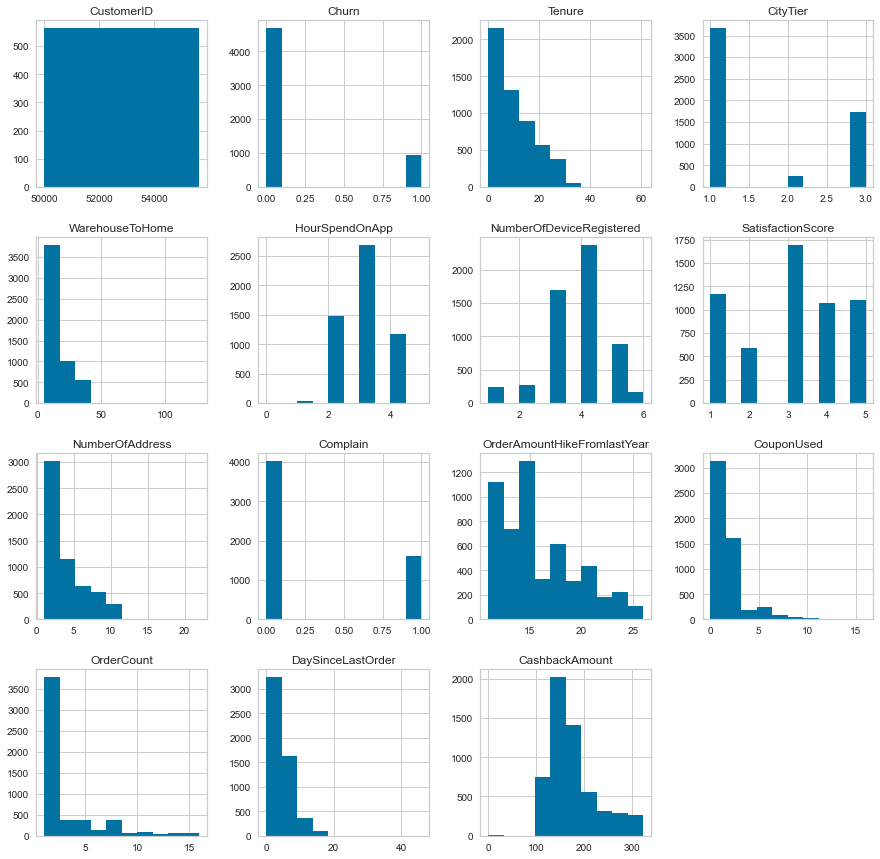

time: 3.86 s (started: 2022-01-29 21:53:25 +07:00)


In [7]:
df.hist(bins=10,figsize=(15,15));

## Handling Missing Values

Pemilihan imputation dengan median karna data median dengan mean tidak terlalu jauh dan juga ketika melihat di boxplot tidak memungkinkan menggunakan mean karna mean sangat berpengaruh dengan outlier yang menyebabkan hasil mean akan sangat jauh dan berpengaruh ke dalam pembuatan model.

In [8]:
# missing values imputation
num_columns = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear','CouponUsed', 'OrderCount', 'DaySinceLastOrder']

for column in num_columns:
    df.loc[df[column].isnull(), column] = df[column].median()

df.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

time: 15 ms (started: 2022-01-29 21:53:29 +07:00)


In [9]:
# Convert data type to integer 
df['HourSpendOnApp'] = df['HourSpendOnApp'].astype(int)
df['Tenure'] = df['Tenure'].astype(int)
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].astype(int)
df['CouponUsed'] = df['CouponUsed'].astype(int)
df['OrderCount'] = df['OrderCount'].astype(int)
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].astype(int)
df["WarehouseToHome"] = df["WarehouseToHome"].astype(int)

time: 2.22 s (started: 2022-01-29 21:53:29 +07:00)


In [10]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                           int32
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                  int32
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                   int32
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear      int32
CouponUsed                       int32
OrderCount                       int32
DaySinceLastOrder                int32
CashbackAmount                 float64
dtype: object

time: 140 ms (started: 2022-01-29 21:53:31 +07:00)


## Inconsistent Data

In [11]:
# Check inconsistent data
for col in df.columns:
       print("=="*10)
       print(f" {col}", df[col].unique())

 CustomerID [50001 50002 50003 ... 55628 55629 55630]
 Churn [1 0]
 Tenure [ 4  9  0 13 11 19 20 14  8 18  5  2 30  1 23  3 29  6 26 28  7 24 25 10
 15 22 27 16 12 21 17 50 60 31 51 61]
 PreferredLoginDevice ['Mobile Phone' 'Phone' 'Computer']
 CityTier [3 1 2]
 WarehouseToHome [  6   8  30  15  12  22  11   9  31  18  13  20  29  28  26  14  10  27
  17  23  33  19  35  24  16  25  32  34   5  21 126   7  36 127]
 PreferredPaymentMode ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
 Gender ['Female' 'Male']
 HourSpendOnApp [3 2 1 0 4 5]
 NumberOfDeviceRegistered [3 4 5 2 1 6]
 PreferedOrderCat ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
 SatisfactionScore [2 3 5 4 1]
 MaritalStatus ['Single' 'Divorced' 'Married']
 NumberOfAddress [ 9  7  6  8  3  2  4 10  1  5 19 21 11 20 22]
 Complain [1 0]
 OrderAmountHikeFromlastYear [11 15 14 23 22 16 12 13 17 18 24 19 20 21 25 26]
 CouponUsed [ 1  0  4  2  9  6 11  7 12 10  5  3 13 15  8

In [12]:
# Merubah PreferredPaymentMode dri CreditCard jadi CC
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({'Credit Card':'CC'})

# Merubah PreferredPaymentMode dri Cash On Delivery jadi COD
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({'Cash on Delivery':'COD'})

# Merubah PreferedOrderCat Device dri Phone jadi Mobile Phone
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace({'Mobile':'Mobile Phone'})

# Merubah Login Device dri Phone jadi Mobile Phone
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace({'Phone':'Mobile Phone'})

#check data set dengan melihat 5 baris pertama
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4,Mobile Phone,3,6,Debit Card,Female,3,3,Laptop & Accessory,2,Single,9,1,11,1,1,5,159.93
1,50002,1,9,Mobile Phone,1,8,UPI,Male,3,4,Mobile Phone,3,Single,7,1,15,0,1,0,120.90
2,50003,1,9,Mobile Phone,1,30,Debit Card,Male,2,4,Mobile Phone,3,Single,6,1,14,0,1,3,120.28
3,50004,1,0,Mobile Phone,3,15,Debit Card,Male,2,4,Laptop & Accessory,5,Single,8,0,23,0,1,3,134.07
4,50005,1,0,Mobile Phone,1,12,CC,Male,3,3,Mobile Phone,5,Single,3,0,11,1,1,3,129.60


time: 94 ms (started: 2022-01-29 21:53:32 +07:00)


## Handling Outliers

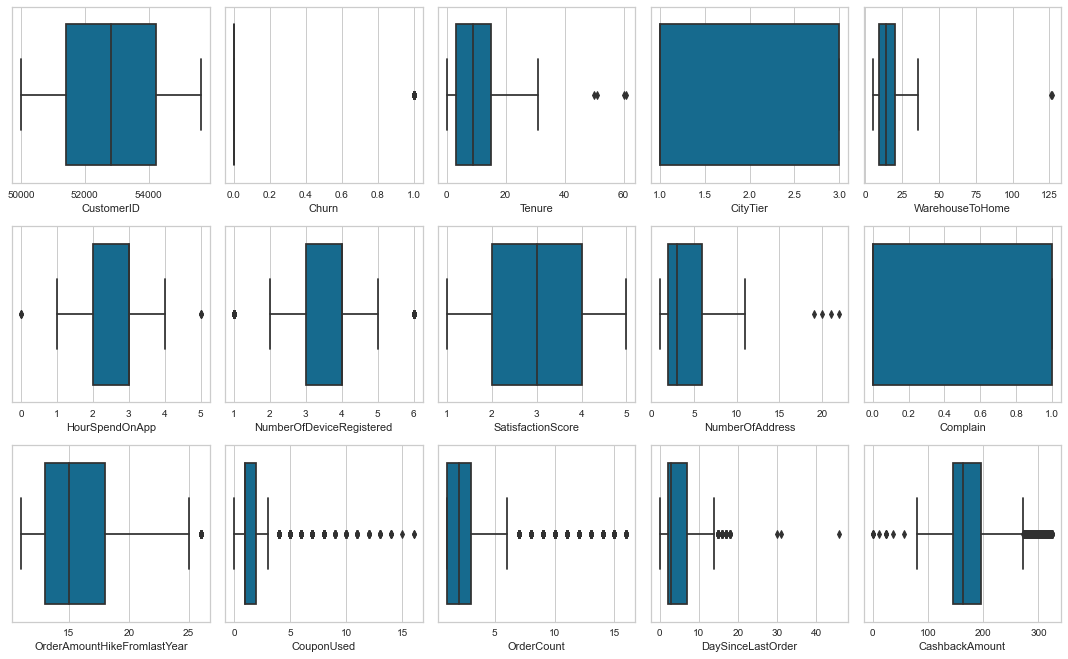

time: 4.22 s (started: 2022-01-29 21:53:32 +07:00)


In [13]:
# outliers check using boxplot
num = df.select_dtypes('number').columns

plt.figure(figsize=(15,15))
for i in range(0,len(num)):
    plt.subplot(5,len(num)/3,i+1)
    sns.boxplot(data=df,x=df[num[i]])
    plt.tight_layout();

Terdapat nilai ekstreme atau outliers pada data. Maka kita gunakan zscore untuk menghilangkan data outliers tersebut.

In [14]:
# z-score
z = np.abs(stats.zscore(df[num]))

print("Data shape sebelum di hilangkan outliers {}".format(df.shape))

#handling outliers menggunakan z_score dengan treshold = 3
df= df[(z < 3).all(axis=1)]

#mengubah nilai outliers pada Hour spend on App menjadi nilai quantile 99%
df["HourSpendOnApp"].values[df["HourSpendOnApp"].values>4]=4

print("Data shape setelah handling outliers {}".format(df.shape))

Data shape sebelum di hilangkan outliers (5630, 20)
Data shape setelah handling outliers (5350, 20)
time: 15 ms (started: 2022-01-29 21:53:36 +07:00)


Setelah dilakukan handling outliers, data bersisa 5350 row dari 5630 row sebelum outliers dibuang atau data yang dibuang sebanyak 300 row, sehingga dataset masih mengandung informasi sebesar 95%. Sehingga penanganan outliers dengan menggunakan metode z score dan capping tidak banyak membuang informasi pada dataset

# Exploratory Data Analysis

In [15]:
#separated numeric and categorical column
num = df.select_dtypes(include=["number"]).columns

cat = df.select_dtypes(include=["object"]).columns

print(num)
print("\n")
print(cat)

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')


Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')
time: 140 ms (started: 2022-01-29 21:53:36 +07:00)


## Numeric

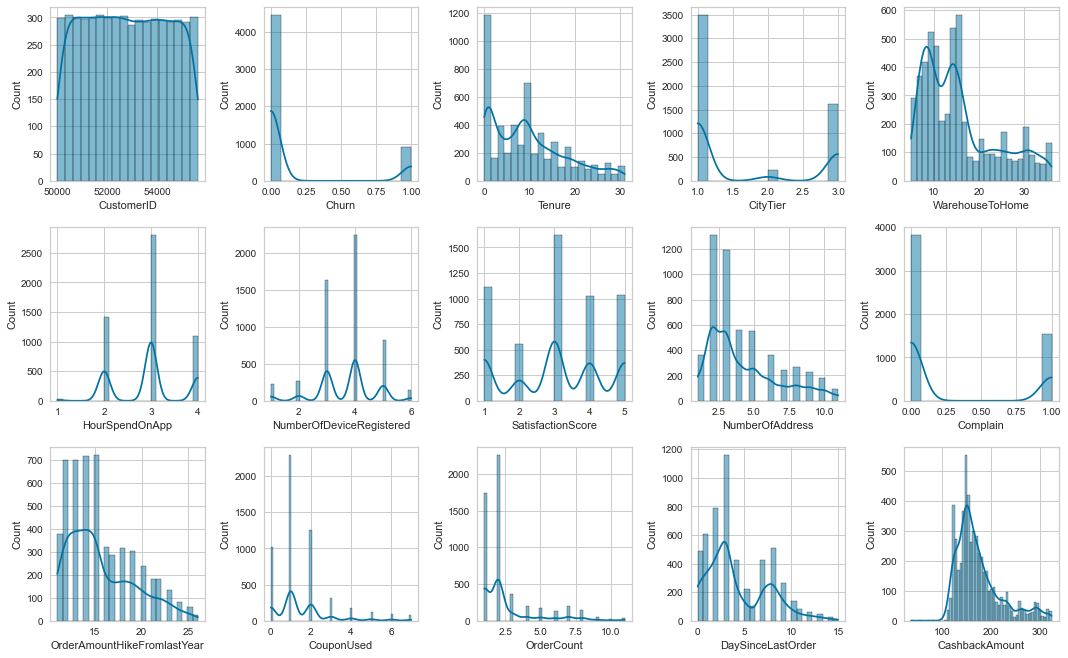

time: 9.91 s (started: 2022-01-29 21:53:37 +07:00)


In [16]:
# histogram check
plt.figure(figsize=(15,15))
for i in range(0,len(num)):
    plt.subplot(5,len(num)/3,i+1)
    sns.histplot(data=df,x=df[num[i]],kde=True)
    plt.tight_layout();

Banyak kolom yang memiliki skew kanan dan skew kiri.

### Proportion Customer Churn  

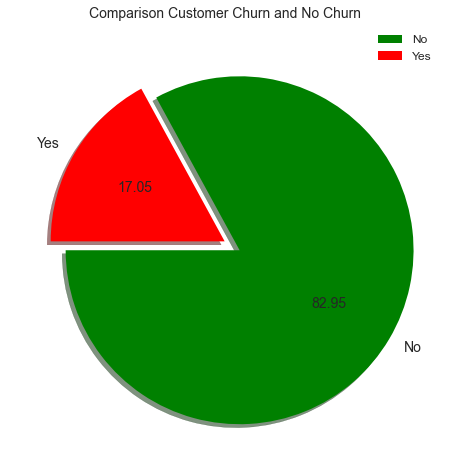

time: 281 ms (started: 2022-01-29 21:53:46 +07:00)


In [17]:
#check proportion of Churn
plt.figure(figsize=(10,8))
plt.pie(df["Churn"].value_counts(),autopct='%.2f',explode=[0.1,0],
        labels=["No","Yes"],shadow=True,textprops={'fontsize': 14},
       colors=["green","red"],startangle=180)
plt.title("Comparison Customer Churn and No Churn",fontsize=14)
plt.legend(fontsize=12,loc="upper right")
plt.show()

Customer yang mengalami churn dari perusahaan adalah sebesar 17.05%.

## Categorical Features

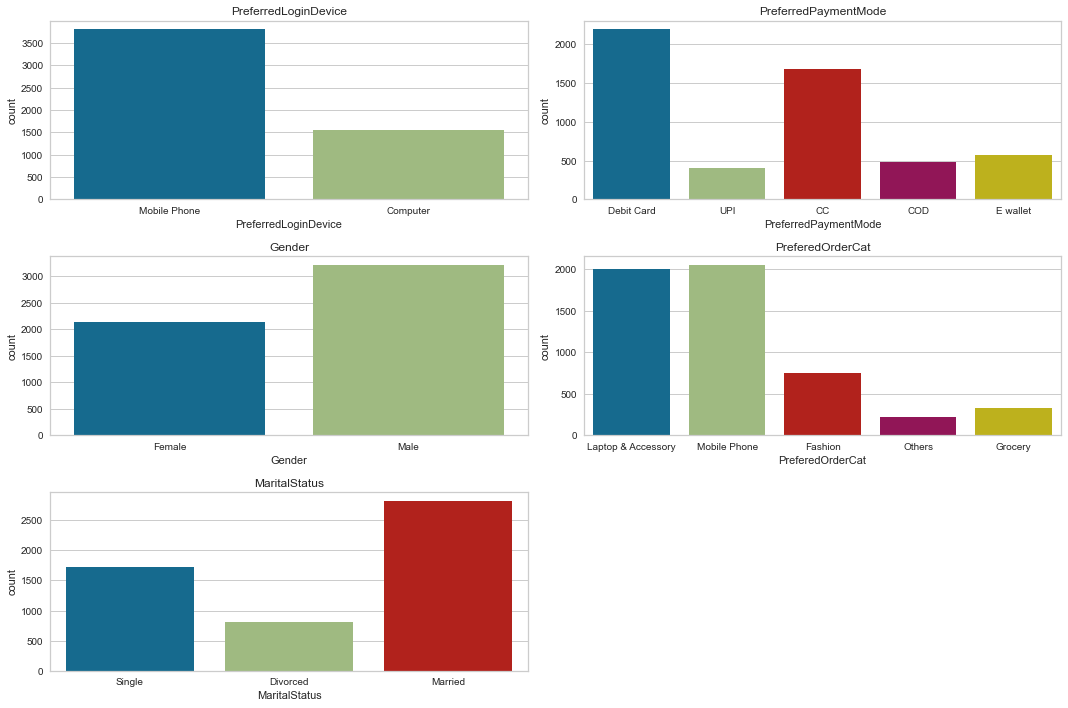

time: 1.39 s (started: 2022-01-29 21:53:47 +07:00)


In [18]:
# Categorical features check
plt.figure(figsize=(15,10))
for i in range(0,len(cat)):
    plt.subplot(3,len(cat)/2,i+1)
    sns.countplot(data=df,x=df[cat[i]]).set_title(cat[i])
    plt.tight_layout();

Dari variable categoric didapatkan informasi: <br>
1. Customer yang menggunakan Mobile phone untuk login lebih banyak dibandingkan menggunakan computer. <br>
2. Customer yang melakukan pembayaran via debit card lebih banyak disusul dengan menggunakan Credit card. <br>
3. Customer berjenis kelamin laki-laki lebih banyak dibandingkan dengan perempuan. <br>
4. Laptop&Accessory, dan mobile phone adalah yang paling banyak dibeli oleh customer. <br>
5. Customer yang telah berstatus menikah lebih banyak dari pada lajang dan cerai.

In [19]:
# Create average cashback per order
df['avg_cashback_per_order'] = df['CashbackAmount']/df['OrderCount']

time: 0 ns (started: 2022-01-29 21:53:48 +07:00)


### Tingkat Churn Rate Berdasarkan Gender

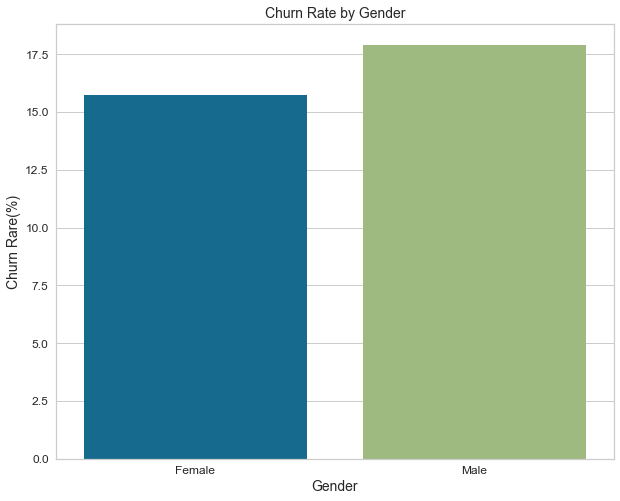

time: 359 ms (started: 2022-01-29 21:53:48 +07:00)


In [20]:
#churn rate by gender
churn_gender = df.groupby("Gender",as_index=False)['Churn'].mean()
churn_gender["Churn"] = churn_gender["Churn"]*100

#visulisasi
plt.figure(figsize=(10,8))
sns.barplot(data=churn_gender,x="Gender",y="Churn")
plt.title("Churn Rate by Gender",fontsize=14)
plt.xlabel("Gender",fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Churn Rare(%)",fontsize=14)
plt.yticks(fontsize=12)
plt.show()

persentase churn tertinggi berasal dari gender pria sebesar 17.5% dari total churn male dan female di kali

In [21]:
#uji chi square
gender_chi_test = pd.crosstab(df.Gender,df.Churn)

#uji hipothesis
Ho = "Gender not have correlation with churn"
H1= "Gender have correlation with churn"

c, p, dof, expected = chi2_contingency(gender_chi_test)

if p<0.05:
    print(H1,"as p value than 0.05, p value is {}".format(p))
else:
    print(Ho,"as p value more than 0.05, p value is {}".format(p))

Gender have correlation with churn as p value than 0.05, p value is 0.04033842642050537
time: 15 ms (started: 2022-01-29 21:53:49 +07:00)


dari hasil uji chi square test antara gender dan churn,  keduanya variable memiliki korelasi.

### Tingkat Churn pada Tenure

In [22]:
#cohort analysis

#yes churn
yes_churn = df.groupby(["Churn","Tenure"]).count().transpose()[1]

#no churn
no_churn = df.groupby(["Churn","Tenure"]).count().transpose()[0]

#churn rate
churn_rate = 100*yes_churn/(yes_churn+no_churn)
churn_rate = churn_rate.T["CustomerID"].dropna()

#membuat dataframe
tenure_churn = pd.DataFrame(churn_rate).reset_index().rename(columns={"CustomerID":"Churn Rate"})

time: 94 ms (started: 2022-01-29 21:53:49 +07:00)


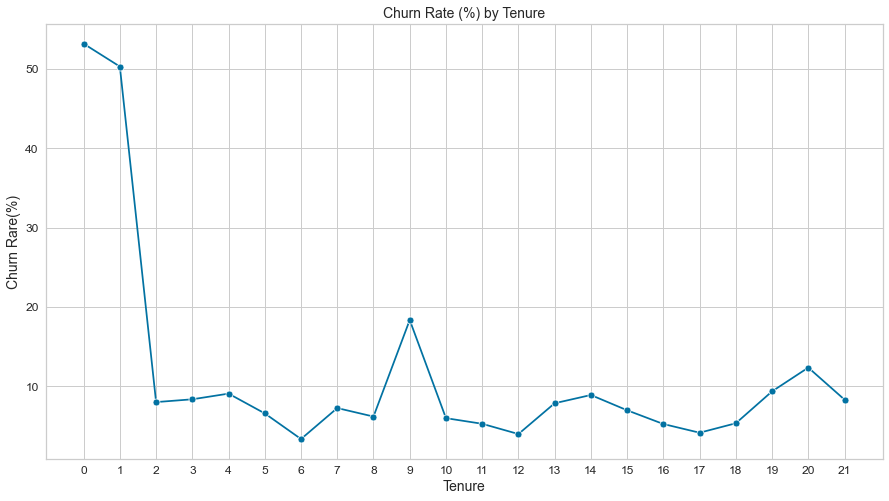

time: 485 ms (started: 2022-01-29 21:53:49 +07:00)


In [23]:
#visualisasi
plt.figure(figsize=(15,8))
sns.lineplot(data=tenure_churn,x="Tenure",y="Churn Rate",marker="o")
plt.title("Churn Rate (%) by Tenure",fontsize=14)
plt.xlabel("Tenure",fontsize=14)
plt.xticks(tenure_churn["Tenure"].values,fontsize=12)
plt.ylabel("Churn Rare(%)",fontsize=14)
plt.yticks(fontsize=12)
plt.show()

adanya hubungan antara tenur dan persentese churn, dimana ketika tenure customer lebih lama, persentase churn mengalamai penurunan. persentase churn tertinggi pada tenure 0 dan 1 kemudian mengalami penurunan ketika tenure customer meningkat. jika dapat mempertahakan customer dengan waktu yang lama akan menyebabkan dampak pada penurunan churn rate.

In [24]:
#membuat klasifikasi tenure menjadi 0-12 bulan, 12-24 bulan dan >24 bulan
def cohort(tenure):
    if tenure <13:
        return "0-12 months"
    elif tenure < 25:
        return "12-24 months"
    else:
        return ">24 months"

time: 0 ns (started: 2022-01-29 21:53:50 +07:00)


In [25]:
df["Tenure_Categoric"] = df["Tenure"].apply(cohort)
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,avg_cashback_per_order,Tenure_Categoric
0,50001,1,4,Mobile Phone,3,6,Debit Card,Female,3,3,Laptop & Accessory,2,Single,9,1,11,1,1,5,159.93,159.930,0-12 months
1,50002,1,9,Mobile Phone,1,8,UPI,Male,3,4,Mobile Phone,3,Single,7,1,15,0,1,0,120.90,120.900,0-12 months
2,50003,1,9,Mobile Phone,1,30,Debit Card,Male,2,4,Mobile Phone,3,Single,6,1,14,0,1,3,120.28,120.280,0-12 months
3,50004,1,0,Mobile Phone,3,15,Debit Card,Male,2,4,Laptop & Accessory,5,Single,8,0,23,0,1,3,134.07,134.070,0-12 months
4,50005,1,0,Mobile Phone,1,12,CC,Male,3,3,Mobile Phone,5,Single,3,0,11,1,1,3,129.60,129.600,0-12 months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10,Computer,1,30,CC,Male,3,2,Laptop & Accessory,1,Married,6,0,18,1,2,4,150.71,75.355,0-12 months
5626,55627,0,13,Mobile Phone,1,13,CC,Male,3,5,Fashion,5,Married,6,0,16,1,2,3,224.91,112.455,12-24 months
5627,55628,0,1,Mobile Phone,1,11,Debit Card,Male,3,2,Laptop & Accessory,4,Married,3,1,21,1,2,4,186.42,93.210,0-12 months
5628,55629,0,23,Computer,3,9,CC,Male,4,5,Laptop & Accessory,4,Married,4,0,15,2,2,9,178.90,89.450,12-24 months


time: 141 ms (started: 2022-01-29 21:53:50 +07:00)


### Churn Rate Berdasarkan Device

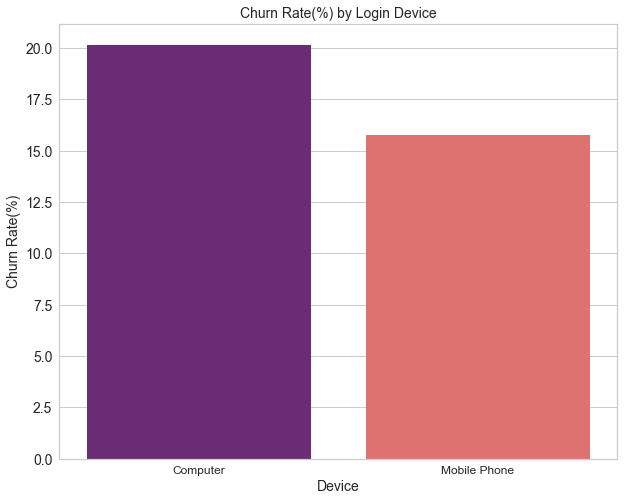

time: 281 ms (started: 2022-01-29 21:53:50 +07:00)


In [26]:
churn_device = 100*(df.groupby(["PreferredLoginDevice"])["Churn"].sum()/df.groupby(["PreferredLoginDevice"])["Churn"].count())
churn_device = churn_device.reset_index()

# visualisasi
plt.figure(figsize=(10,8))
sns.barplot(data=churn_device,x="PreferredLoginDevice",y="Churn",palette="magma")
plt.title("Churn Rate(%) by Login Device",fontsize=14)
plt.xlabel("Device",fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Churn Rate(%)",fontsize=14)
plt.yticks(fontsize=14)
plt.show()

berdasarkan dari penggunaan device, para customer yang menunggukan computer memiliki persentase 20% sedangkan customer yang menggunakan mobile phone memiliki tingkat persentase churn berkisar 15%

In [27]:
#ujii chi square
device_chi_test = pd.crosstab(df.PreferredLoginDevice,df.Churn)

#uji hipothesis
Ho = "Device Login not have correlation with churn"
H1= "Device Login have correlation with churn"

c, p, dof, expected = chi2_contingency(device_chi_test)

if p<0.05:
    print(H1,"as p value than 0.05, p value is {}".format(p))
else:
    print(Ho,"as p value more than 0.05, p value is {}".format(p))

Device Login have correlation with churn as p value than 0.05, p value is 0.00012703058550390554
time: 16 ms (started: 2022-01-29 21:53:50 +07:00)


dari hasil uji correlasi menggunakan chi square, didapatkan kesimpulan bahwa perbedaan device login memiliki korelasi dengan tingkat churn

  PreferredLoginDevice  Gender     Churn
0             Computer  Female  0.217105
1             Computer    Male  0.191693
2         Mobile Phone  Female  0.133508
3         Mobile Phone    Male  0.174066


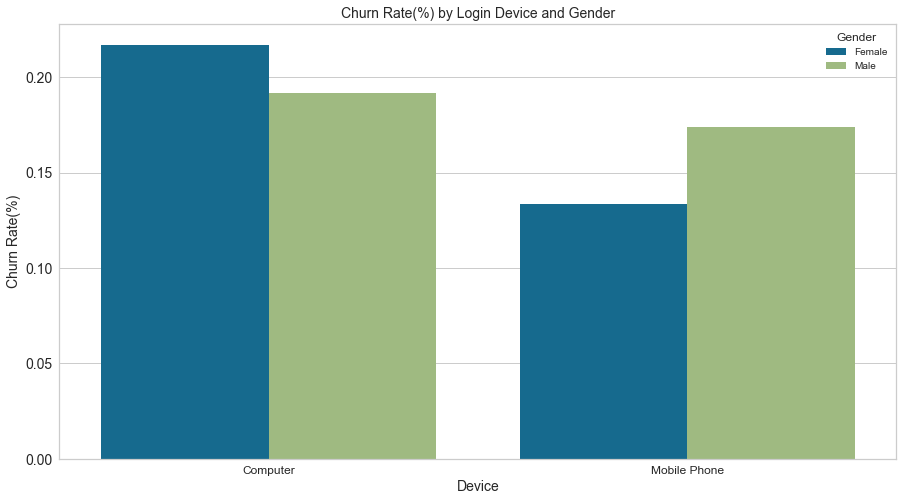

time: 328 ms (started: 2022-01-29 21:53:50 +07:00)


In [28]:
device_gender = df.groupby(["PreferredLoginDevice","Gender"],as_index=False)["Churn"].mean()

#visualisasi
print(df.groupby(["PreferredLoginDevice","Gender"],as_index=False)["Churn"].mean())
plt.figure(figsize=(15,8))
sns.barplot(data=device_gender,hue="Gender",y="Churn",x="PreferredLoginDevice")
plt.title("Churn Rate(%) by Login Device and Gender",fontsize=14)
plt.xlabel("Device",fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Churn Rate(%)",fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Jika di analisa lebih lanjut, kebanyakan customer yang churn menggunakan computer adalah wanita dengan persentase churn berkisar 21% dan customer yang churn menunggakan device mobile adalah pria dengan persentase churn sebesar 17% dari total churn

### Churn Rate Berdasarkan Payment mode

  PreferredPaymentMode  Churn
1                  COD  24.95
3             E wallet  23.83
4                  UPI  17.96
2           Debit Card  15.26
0                   CC  14.53


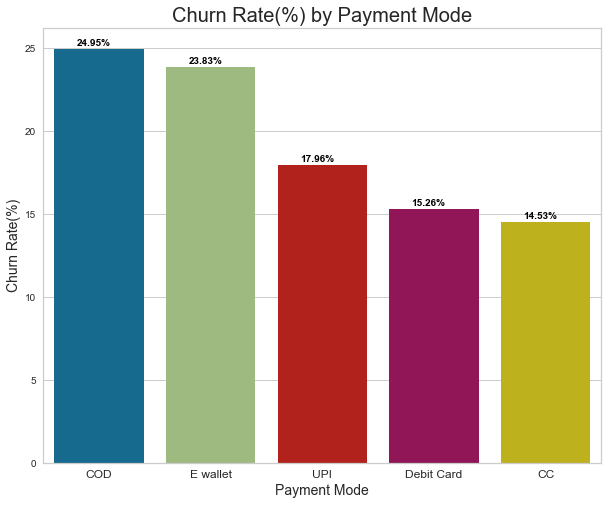

<Figure size 720x576 with 0 Axes>

time: 328 ms (started: 2022-01-29 21:53:51 +07:00)


In [29]:
payment_churn = df.groupby("PreferredPaymentMode",as_index=False)["Churn"].mean().sort_values("Churn",ascending=False)
payment_churn['Churn'] = round(payment_churn['Churn'] * 100, 2)

fig, ax = plt.subplots(ncols=1, figsize=(10, 8))
x = np.arange(len(payment_churn['Churn']))
y = payment_churn['Churn']
for i, v in enumerate(y):
    ax.text(x[i]-0.2, v+0.2, str(v)+'%', fontsize = 10, color='black', fontweight='bold')

#visualisasi
print(payment_churn)
plt.figure(figsize=(10,8))
s = sns.barplot(data=payment_churn,y="Churn",x="PreferredPaymentMode", ax=ax)
# ax.set_title("Churn Rate(%) by Payment Mode",fontsize=14)
# plt.xlabel("Payment Mode",fontsize=14)

ax.set_title("Churn Rate(%) by Payment Mode", fontsize=20)
ax.set_ylabel("Churn Rate(%)",fontsize=14)
ax.set_xlabel("Payment Mode",fontsize=14)
s.set_xticklabels(s.get_xticklabels(), fontsize=12)
plt.show()

Berdasarkan dari metode pembayaran, COD adalah metode pembayaran dengan tingkat churn yang tinggi berkisar 25% dari total churn disusul dengan metode pembayaran E-wallet berkisar 24% dan yang terendah adalah payment mode CC berkisar 14.5%

  PreferredPaymentMode  Gender      Churn
0                   CC  Female  10.329986
2                  COD  Female  19.889503
4           Debit Card  Female  16.742081
6             E wallet  Female  24.896266
8                  UPI  Female  15.037594
1                   CC    Male  17.492417
3                  COD    Male  27.922078
5           Debit Card    Male  14.263921
7             E wallet    Male  23.076923
9                  UPI    Male  19.402985


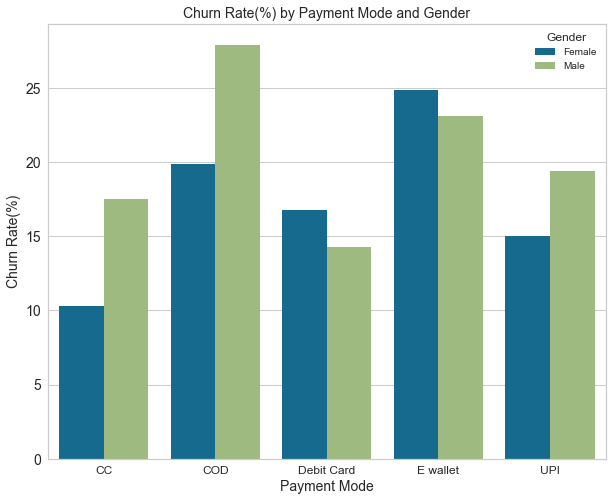

time: 360 ms (started: 2022-01-29 21:53:51 +07:00)


In [30]:
# Hubungan gender dan payment
payment_gender = df.groupby(["PreferredPaymentMode","Gender"],as_index=False)["Churn"].mean().sort_values("Gender")
payment_gender["Churn"] = payment_gender["Churn"]*100

#visualisasi
print(payment_gender)
plt.figure(figsize=(10,8))
sns.barplot(data=payment_gender,y="Churn",hue="Gender",x="PreferredPaymentMode")
plt.title("Churn Rate(%) by Payment Mode and Gender",fontsize=14)
plt.xlabel("Payment Mode",fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Churn Rate(%)",fontsize=14)
plt.yticks(fontsize=14)
plt.show()

   PreferredPaymentMode MaritalStatus      Churn
0                    CC      Divorced  14.342629
1                    CC       Married  11.964874
2                    CC        Single  19.083969
3                   COD      Divorced  16.666667
4                   COD       Married  14.693878
5                   COD        Single  43.023256
6            Debit Card      Divorced  15.644172
7            Debit Card       Married   8.977778
8            Debit Card        Single  24.596774
9              E wallet      Divorced  14.141414
10             E wallet       Married  15.032680
11             E wallet        Single  44.827586
12                  UPI      Divorced   7.272727
13                  UPI       Married  16.806723
14                  UPI        Single  25.925926


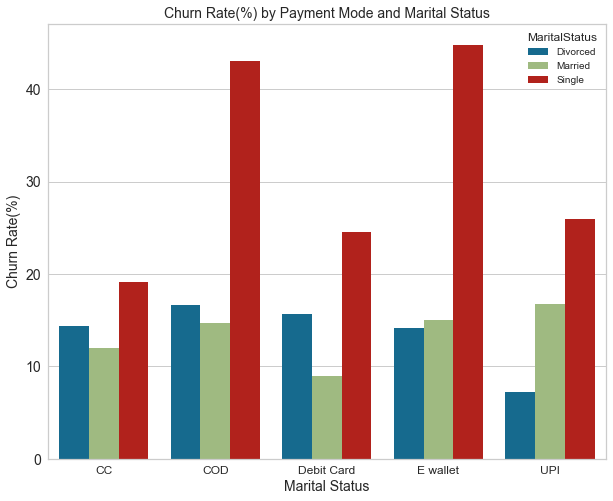

time: 406 ms (started: 2022-01-29 21:53:51 +07:00)


In [31]:
#hubungan marital status dan payment
payment_marital = df.groupby(["PreferredPaymentMode","MaritalStatus"],as_index=False)["Churn"].mean()
payment_marital["Churn"] = payment_marital["Churn"]*100

#visualisasi
print(payment_marital)
plt.figure(figsize=(10,8))
sns.barplot(data=payment_marital,y="Churn",hue="MaritalStatus",x="PreferredPaymentMode")
plt.title("Churn Rate(%) by Payment Mode and Marital Status",fontsize=14)
plt.xlabel("Marital Status",fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Churn Rate(%)",fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Churn Rate Berdasarkan Barang Yang Dibeli

     PreferedOrderCat      Churn
3        Mobile Phone  27.374574
0             Fashion  15.824468
2  Laptop & Accessory  10.300000
4              Others   5.633803
1             Grocery   3.915663


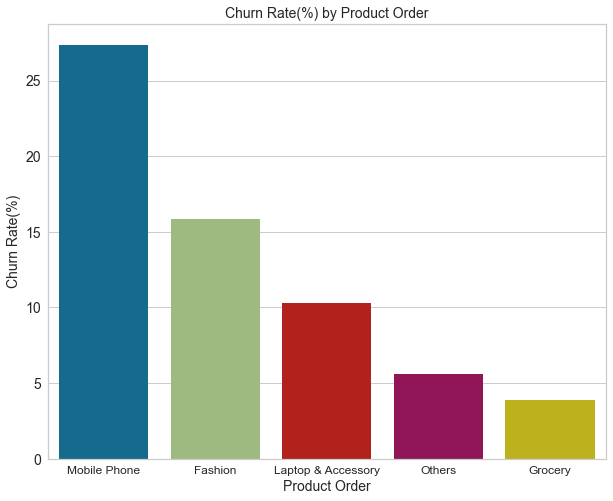

time: 265 ms (started: 2022-01-29 21:53:52 +07:00)


In [32]:
churn_product = df.groupby('PreferedOrderCat',as_index=False)["Churn"].mean().sort_values('Churn',ascending=False)
churn_product["Churn"] = churn_product["Churn"]*100

#visualisasi
print(churn_product)
plt.figure(figsize=(10,8))
sns.barplot(data=churn_product,y="Churn",x="PreferedOrderCat")
plt.title("Churn Rate(%) by Product Order",fontsize=14)
plt.xlabel("Product Order",fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Churn Rate(%)",fontsize=14)
plt.yticks(fontsize=14)
plt.show()

berdasarkan dari product yang diorder 27% dari total churn disebabkan oleh pembelian mobile phone, dan product yang diorder memiliki tingkat churn yang rendah adalah Grocery dengan tingkat churn berkisar 4% dari total churn

     PreferedOrderCat  Complain
3        Mobile Phone       601
2  Laptop & Accessory       552
0             Fashion       221
1             Grocery       103
4              Others        55


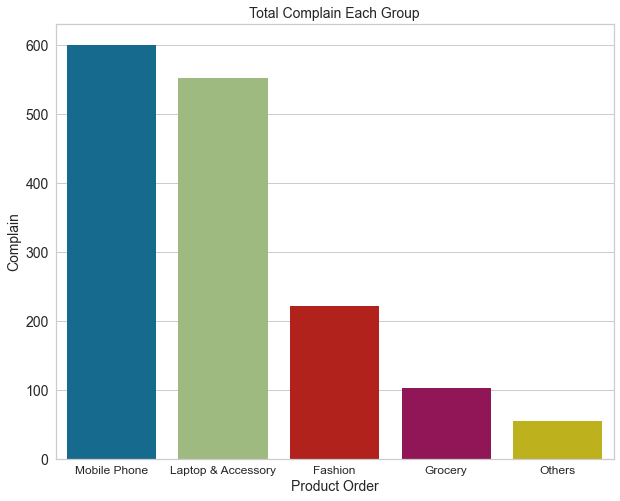

time: 266 ms (started: 2022-01-29 21:53:52 +07:00)


In [33]:
product_complain = df.groupby(["PreferedOrderCat"],as_index=False)["Complain"].sum().sort_values("Complain",ascending=False)

#visualisasi
print(product_complain)
plt.figure(figsize=(10,8))
sns.barplot(data=product_complain,y="Complain",x="PreferedOrderCat")
plt.title("Total Complain Each Group",fontsize=14)
plt.xlabel("Product Order",fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Complain",fontsize=14)
plt.yticks(fontsize=14)
plt.show()

     PreferedOrderCat  avg_cashback_per_order
4              Others              153.197097
1             Grocery              123.532906
0             Fashion              107.307609
2  Laptop & Accessory               97.197972
3        Mobile Phone               87.386965


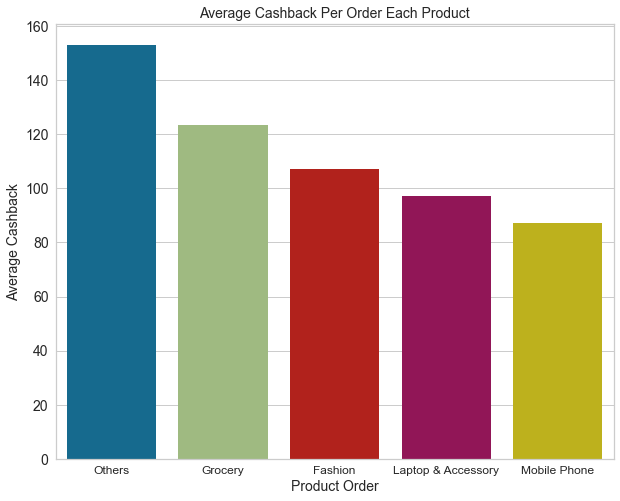

time: 422 ms (started: 2022-01-29 21:53:52 +07:00)


In [34]:
avgcashback_product = df.groupby('PreferedOrderCat',as_index=False)["avg_cashback_per_order"].mean().sort_values('avg_cashback_per_order',ascending=False)
#visualisasi
print(avgcashback_product )
plt.figure(figsize=(10,8))
sns.barplot(data=avgcashback_product,y="avg_cashback_per_order",x="PreferedOrderCat")
plt.title("Average Cashback Per Order Each Product",fontsize=14)
plt.xlabel("Product Order",fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Average Cashback",fontsize=14)
plt.yticks(fontsize=14)
plt.show()

jika dihubungkan dengan rata rata cashback per order dan total complain, mobile phone memberikan rata rata chasback yang kecil dan juga memiliki total complain yang banyak sehigga hal ini memungkinan terjadinya churn karena customer mendapatkan tempat pembelian mobile phone yang lebih murah dan memberikan tawaran cashback yang lebih baik yang juga product yang didapatkan sesuai keinginan

In [35]:
pd.crosstab(df.PreferredPaymentMode,df.PreferedOrderCat,normalize="index")

PreferedOrderCat,Fashion,Grocery,Laptop & Accessory,Mobile Phone,Others
PreferredPaymentMode,,,,,
CC,0.128114,0.064057,0.339265,0.420522,0.048043
COD,0.165644,0.049080,0.286299,0.486708,0.012270
Debit Card,0.136674,0.068337,0.370843,0.391344,0.032802
E wallet,0.189983,0.055268,0.564767,0.138169,0.051813
UPI,0.112219,0.044888,0.366584,0.416459,0.059850


time: 172 ms (started: 2022-01-29 21:53:53 +07:00)


In [36]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,avg_cashback_per_order,Tenure_Categoric
0,50001,1,4,Mobile Phone,3,6,Debit Card,Female,3,3,Laptop & Accessory,2,Single,9,1,11,1,1,5,159.93,159.93,0-12 months
1,50002,1,9,Mobile Phone,1,8,UPI,Male,3,4,Mobile Phone,3,Single,7,1,15,0,1,0,120.90,120.90,0-12 months
2,50003,1,9,Mobile Phone,1,30,Debit Card,Male,2,4,Mobile Phone,3,Single,6,1,14,0,1,3,120.28,120.28,0-12 months
3,50004,1,0,Mobile Phone,3,15,Debit Card,Male,2,4,Laptop & Accessory,5,Single,8,0,23,0,1,3,134.07,134.07,0-12 months
4,50005,1,0,Mobile Phone,1,12,CC,Male,3,3,Mobile Phone,5,Single,3,0,11,1,1,3,129.60,129.60,0-12 months


time: 203 ms (started: 2022-01-29 21:53:53 +07:00)


In [37]:
num = ['Tenure','CityTier','WarehouseToHome',
      'HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore',
     'NumberOfAddress','Complain','OrderAmountHikeFromlastYear',
      'CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount',
      'avg_cashback_per_order']
#melihat hubungan numerik dengan varabel target
df.groupby("Churn")[num].agg("mean")

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,avg_cashback_per_order
Churn,,,,,,,,,,,,,,
0,11.060162,1.615142,15.257098,2.921136,3.620099,2.986706,4.150293,0.233438,15.661334,1.524786,2.578864,4.479270,177.999845,100.274777
1,3.691886,1.835526,16.924342,2.968202,3.942982,3.395833,4.421053,0.543860,15.664474,1.509868,2.460526,3.028509,157.937292,91.141610


time: 110 ms (started: 2022-01-29 21:53:53 +07:00)


### Churn By Distance

<AxesSubplot:xlabel='WarehouseToHome'>

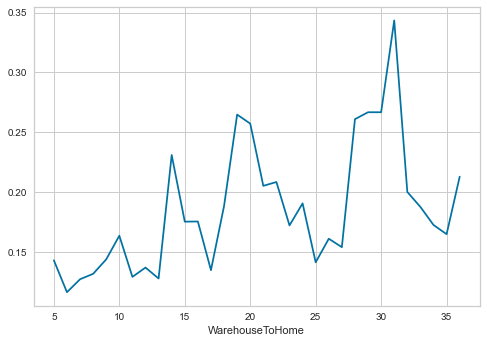

time: 312 ms (started: 2022-01-29 21:53:54 +07:00)


In [38]:
df.groupby("WarehouseToHome")["Churn"].mean().plot()

def bining(x):
    if x <10:
        return "5-9"
    elif x<=14:
        return "10-14"
    elif x<=20:
        return "15-20"
    else:
        return ">20"

In [39]:
def bining(x):
    if x <10:
        return "<10"
    elif x>=10 and x<=20:
        return "10-20"
    else:
        return ">20"

time: 0 ns (started: 2022-01-29 21:53:54 +07:00)


In [40]:
df["distance"] = df["WarehouseToHome"].apply(bining)

df["distance"].value_counts()

10-20    2471
<10      1601
>20      1278
Name: distance, dtype: int64

time: 78 ms (started: 2022-01-29 21:53:54 +07:00)


  distance      Churn
1      <10  13.179263
0    10-20  17.604209
2      >20  20.813772


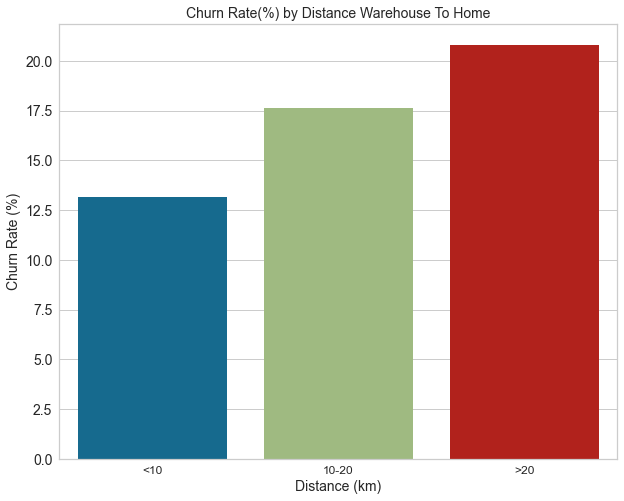

time: 515 ms (started: 2022-01-29 21:53:54 +07:00)


In [41]:
distance_churn = df.groupby("distance",as_index=False)["Churn"].mean().sort_values("Churn")
distance_churn["Churn"] = distance_churn["Churn"] * 100
#visualisasi
print(distance_churn)
plt.figure(figsize=(10,8))
sns.barplot(data=distance_churn,y="Churn",x="distance")
plt.title("Churn Rate(%) by Distance Warehouse To Home",fontsize=14)
plt.xlabel("Distance (km)",fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Churn Rate (%)",fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Berdasarkan jarak antara warehouse dengan rumah costumer, semakin jauh jarak warehouse dengan rumah customer, churn cenderung meningkat, hal kemungkinan karena waktu pemesanan produk ke rumah customer memiliki waktu yang lebih lama dibandingkan dengan waktu kedatangan produk pesanan yang jarak rumahnya dekat dengan warehouse

In [42]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,avg_cashback_per_order,Tenure_Categoric,distance
0,50001,1,4,Mobile Phone,3,6,Debit Card,Female,3,3,Laptop & Accessory,2,Single,9,1,11,1,1,5,159.93,159.93,0-12 months,<10
1,50002,1,9,Mobile Phone,1,8,UPI,Male,3,4,Mobile Phone,3,Single,7,1,15,0,1,0,120.90,120.90,0-12 months,<10
2,50003,1,9,Mobile Phone,1,30,Debit Card,Male,2,4,Mobile Phone,3,Single,6,1,14,0,1,3,120.28,120.28,0-12 months,>20
3,50004,1,0,Mobile Phone,3,15,Debit Card,Male,2,4,Laptop & Accessory,5,Single,8,0,23,0,1,3,134.07,134.07,0-12 months,10-20
4,50005,1,0,Mobile Phone,1,12,CC,Male,3,3,Mobile Phone,5,Single,3,0,11,1,1,3,129.60,129.60,0-12 months,10-20


time: 16 ms (started: 2022-01-29 21:53:55 +07:00)


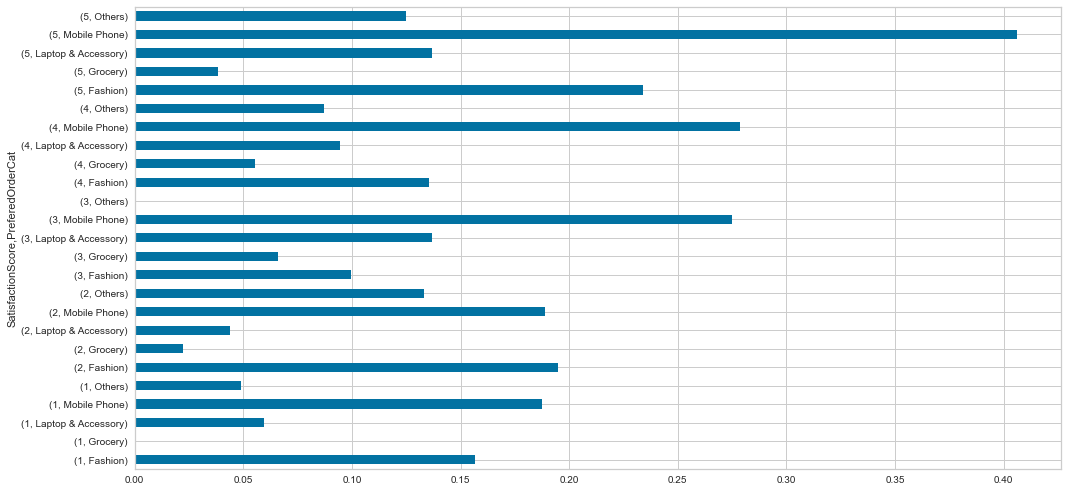

time: 953 ms (started: 2022-01-29 21:53:55 +07:00)


In [43]:
plt.figure(figsize=(15, 7))
df.groupby(["SatisfactionScore","PreferedOrderCat"])["Churn"].mean().plot(kind="barh")
plt.tight_layout()
plt.show()

In [44]:
Ho = "Statisfication not have correlation to churn"
H1 = "Statisfication have correlation to churn"


statisfication_no = np.array(df[df["Churn"]==0]["SatisfactionScore"])
statisfication_yes = np.array(df[df["Churn"]==1]["SatisfactionScore"])

#hypothesis testing
t,p_value=stats.ttest_ind(statisfication_no,statisfication_yes)

if p_value<0.05:
    print(H1,"as the P value less than 0.05, the p value is {}".format(p_value))
else:
    print(H0,"as the P value more than 0.05, the p value is {}".format(p_value))


Statisfication have correlation to churn as the P value less than 0.05, the p value is 2.7015080002316886e-16
time: 0 ns (started: 2022-01-29 21:53:56 +07:00)


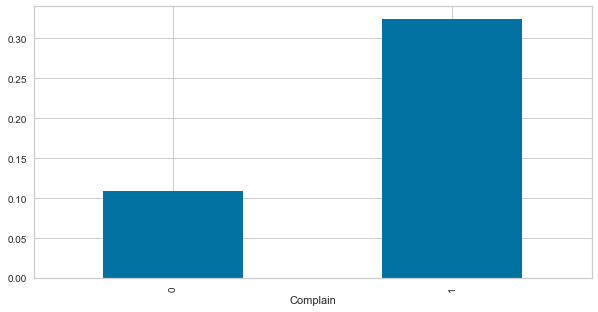

time: 906 ms (started: 2022-01-29 21:53:56 +07:00)


In [45]:
plt.figure(figsize=(10, 5))
df.groupby("Complain")["Churn"].mean().plot(kind="bar")
plt.show()


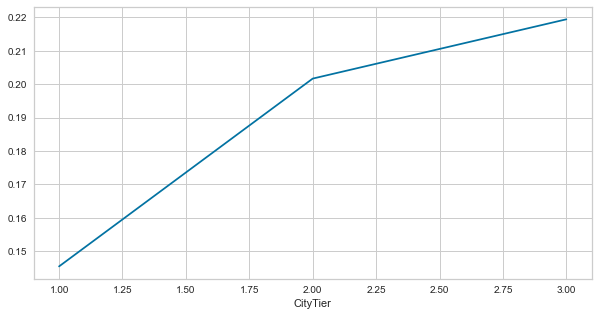

time: 250 ms (started: 2022-01-29 21:53:57 +07:00)


In [46]:
plt.figure(figsize=(10, 5))
df.groupby(["CityTier"])["Churn"].mean().plot()
plt.show()

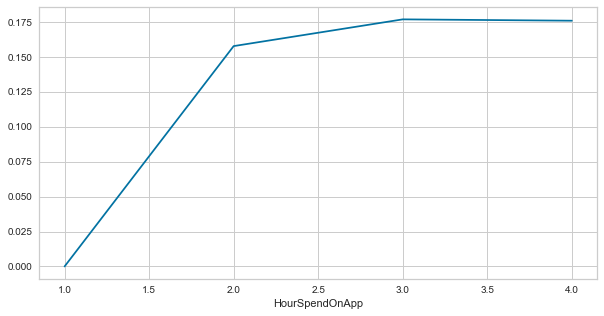

time: 250 ms (started: 2022-01-29 21:53:57 +07:00)


In [47]:
plt.figure(figsize=(10, 5))
df.groupby(["HourSpendOnApp"])["Churn"].mean().plot()
plt.show()

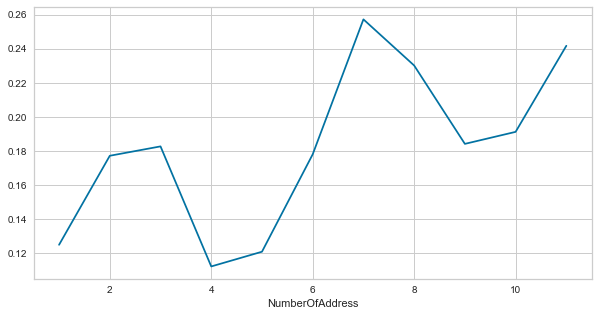

time: 235 ms (started: 2022-01-29 21:53:57 +07:00)


In [48]:
plt.figure(figsize=(10, 5))
df.groupby(["NumberOfAddress"])["Churn"].mean().plot()
plt.show()

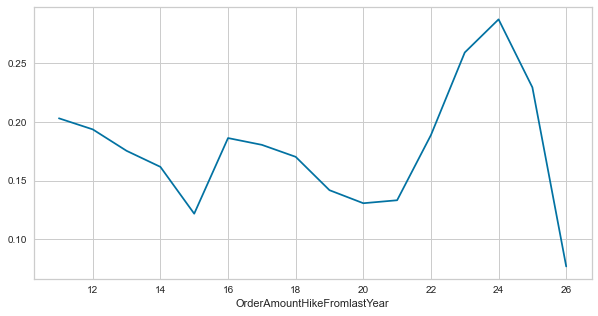

time: 234 ms (started: 2022-01-29 21:53:58 +07:00)


In [49]:
plt.figure(figsize=(10, 5))
df.groupby(["OrderAmountHikeFromlastYear"])["Churn"].mean().plot()
plt.show()

## Corellation Numeric with Target

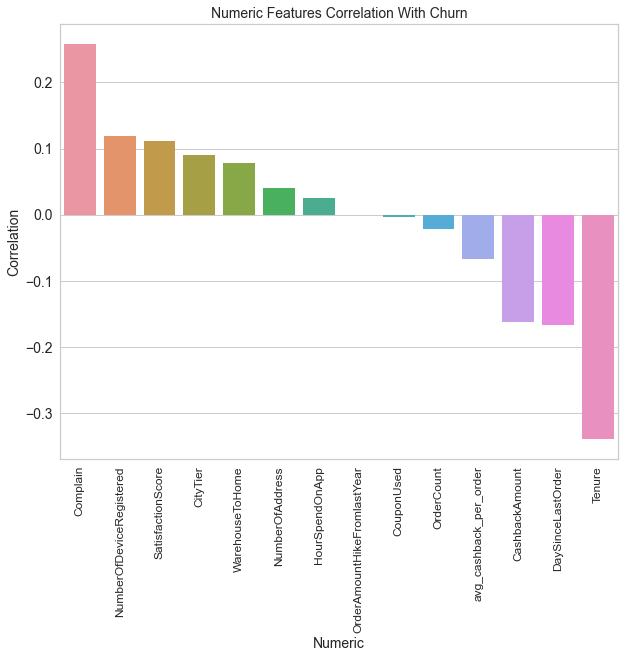

time: 438 ms (started: 2022-01-29 21:53:58 +07:00)


In [50]:
num_cor = df.select_dtypes('number').columns

num_cor = df[num_cor].corr()["Churn"].iloc[2::].reset_index().sort_values("Churn",ascending=False)

#visualisasi
plt.figure(figsize=(10,8))
sns.barplot(data=num_cor,y="Churn",x="index")
plt.title("Numeric Features Correlation With Churn",fontsize=14)
plt.xlabel("Numeric",fontsize=14)
plt.xticks(fontsize=12,rotation=90)
plt.ylabel("Correlation",fontsize=14)
plt.yticks(fontsize=14)
plt.show()

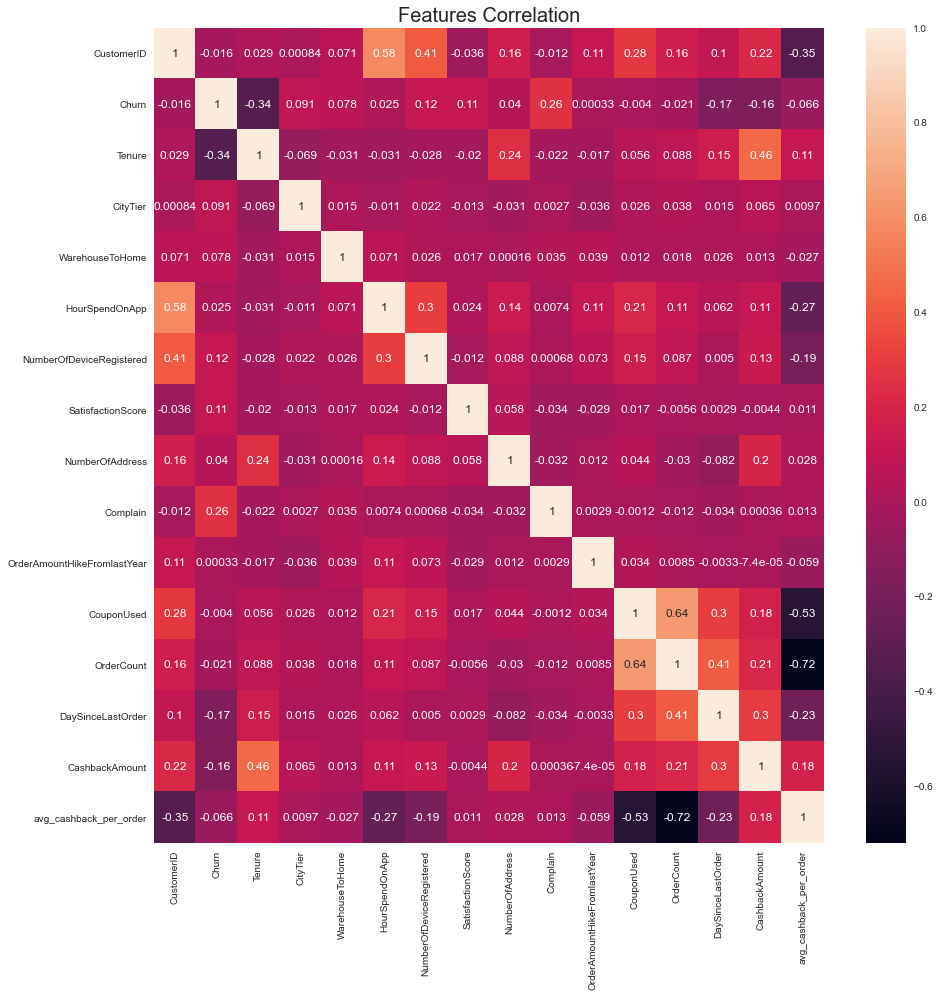

time: 4.86 s (started: 2022-01-29 21:53:58 +07:00)


In [51]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".2g")
plt.title("Features Correlation",fontsize=20)
plt.show()

### Corrrelation Categorical With Target

In [52]:
device_dummies = pd.get_dummies(df["PreferredLoginDevice"],prefix="Divice")
payment_dummies = pd.get_dummies(df["PreferredPaymentMode"],prefix="Payment")
gender_dummies = pd.get_dummies(df["Gender"],prefix="Gender")
order_dummies = pd.get_dummies(df["PreferedOrderCat"],prefix="Order")
marital_dummies = pd.get_dummies(df["MaritalStatus"],prefix="Status")
tenure_dummies = pd.get_dummies(df["Tenure_Categoric"],prefix="Tenure")
distance_dummies = pd.get_dummies(df["distance"],prefix="Distance")

#gabungkang kolom dummies dengan kolom churn
churn_cat = pd.concat([device_dummies,payment_dummies,gender_dummies,gender_dummies,
                       order_dummies,marital_dummies,
                       tenure_dummies,distance_dummies,df["Churn"]],axis=1)

churn_cat

,Divice_Computer,Divice_Mobile Phone,Payment_CC,Payment_COD,Payment_Debit Card,Payment_E wallet,Payment_UPI,Gender_Female,Gender_Male,Gender_Female,Gender_Male,Order_Fashion,Order_Grocery,Order_Laptop & Accessory,Order_Mobile Phone,Order_Others,Status_Divorced,Status_Married,Status_Single,Tenure_0-12 months,Tenure_12-24 months,Tenure_>24 months,Distance_10-20,Distance_<10,Distance_>20,Churn
0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1
1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1
2,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1
3,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1
4,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
5626,0,1,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0
5627,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0
5628,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0


time: 47 ms (started: 2022-01-29 21:54:03 +07:00)


In [53]:
churn_cat = pd.DataFrame(churn_cat.corr()["Churn"]).reset_index().rename(columns=({
    "index":"categorical",
    "Churn":"correlation"})).sort_values("correlation",ascending=False)

time: 32 ms (started: 2022-01-29 21:54:03 +07:00)


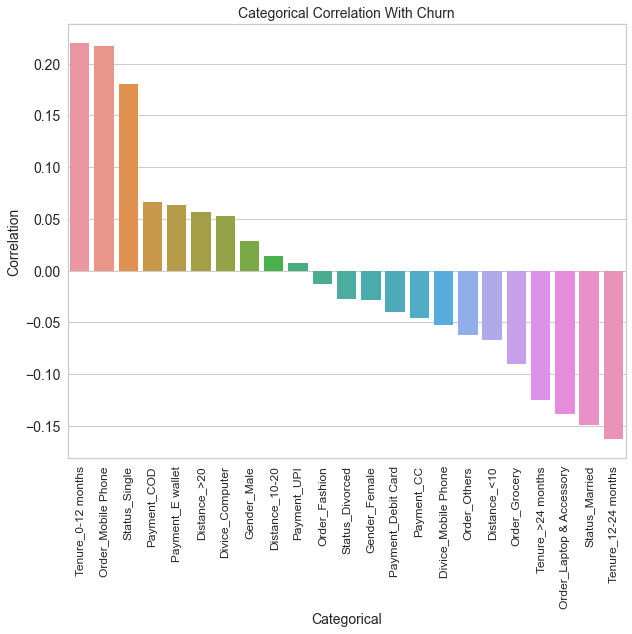

time: 703 ms (started: 2022-01-29 21:54:04 +07:00)


In [54]:
churn_cat = churn_cat[1:]
plt.figure(figsize=(10,8))
sns.barplot(data=churn_cat,y="correlation",x="categorical")
plt.title("Categorical Correlation With Churn",fontsize=14)
plt.xlabel("Categorical",fontsize=14)
plt.xticks(fontsize=12,rotation=90)
plt.ylabel("Correlation",fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [55]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,avg_cashback_per_order,Tenure_Categoric,distance
0,50001,1,4,Mobile Phone,3,6,Debit Card,Female,3,3,Laptop & Accessory,2,Single,9,1,11,1,1,5,159.93,159.93,0-12 months,<10
1,50002,1,9,Mobile Phone,1,8,UPI,Male,3,4,Mobile Phone,3,Single,7,1,15,0,1,0,120.90,120.90,0-12 months,<10
2,50003,1,9,Mobile Phone,1,30,Debit Card,Male,2,4,Mobile Phone,3,Single,6,1,14,0,1,3,120.28,120.28,0-12 months,>20
3,50004,1,0,Mobile Phone,3,15,Debit Card,Male,2,4,Laptop & Accessory,5,Single,8,0,23,0,1,3,134.07,134.07,0-12 months,10-20
4,50005,1,0,Mobile Phone,1,12,CC,Male,3,3,Mobile Phone,5,Single,3,0,11,1,1,3,129.60,129.60,0-12 months,10-20


time: 15 ms (started: 2022-01-29 21:54:04 +07:00)


# Feature Engineering

## Remove Features
Kita akah menghapus feature yang dirasa tidak penting. Feature CustomerID akan kita hapus karena feature tersebut tidak akan kita butuhkan.

In [56]:
# Drop CustomerID
df.drop('CustomerID', axis=1, inplace=True)

time: 125 ms (started: 2022-01-29 21:54:04 +07:00)


## Feature Encoding
Karena tidak semua model machine learning dapat menangani data kategorikal, maka kita akan rubah data kategorikal menjadi numerik.
Pada step ini akan dilakukan dua metode encoding, yaitu OrdialEncoding dan Ohe-Hot Encoding
- Ordinal Encoding dilakukan pada feature dengan kategori ordinal
- One-Hot Encoding dilakukan pada feature dengan kategori nominal 

In [57]:
# Ordinal Encoding using category_encoder
encoder = ce.OrdinalEncoder(cols='distance', return_df=True,
                           mapping=[{'col':'distance', 
                           'mapping':{
                               None:0, 
                               '<10':1, # <10 to 1
                               '10-20':2, # 10-20 to 2 
                               '>20':3}}]) # >20 to 3

df = encoder.fit_transform(df)

time: 125 ms (started: 2022-01-29 21:54:05 +07:00)


In [58]:
# One-Hot encoding using dummies
df = pd.get_dummies(df)
df

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,avg_cashback_per_order,distance,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredPaymentMode_CC,PreferredPaymentMode_COD,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Female,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Tenure_Categoric_0-12 months,Tenure_Categoric_12-24 months,Tenure_Categoric_>24 months
0,1,4,3,6,3,3,2,9,1,11,1,1,5,159.93,159.930,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0
1,1,9,1,8,3,4,3,7,1,15,0,1,0,120.90,120.900,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0
2,1,9,1,30,2,4,3,6,1,14,0,1,3,120.28,120.280,3,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0
3,1,0,3,15,2,4,5,8,0,23,0,1,3,134.07,134.070,2,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0
4,1,0,1,12,3,3,5,3,0,11,1,1,3,129.60,129.600,2,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10,1,30,3,2,1,6,0,18,1,2,4,150.71,75.355,3,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
5626,0,13,1,13,3,5,5,6,0,16,1,2,3,224.91,112.455,2,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0
5627,0,1,1,11,3,2,4,3,1,21,1,2,4,186.42,93.210,2,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
5628,0,23,3,9,4,5,4,4,0,15,2,2,9,178.90,89.450,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0


time: 203 ms (started: 2022-01-29 21:54:05 +07:00)


## Feature Scaling

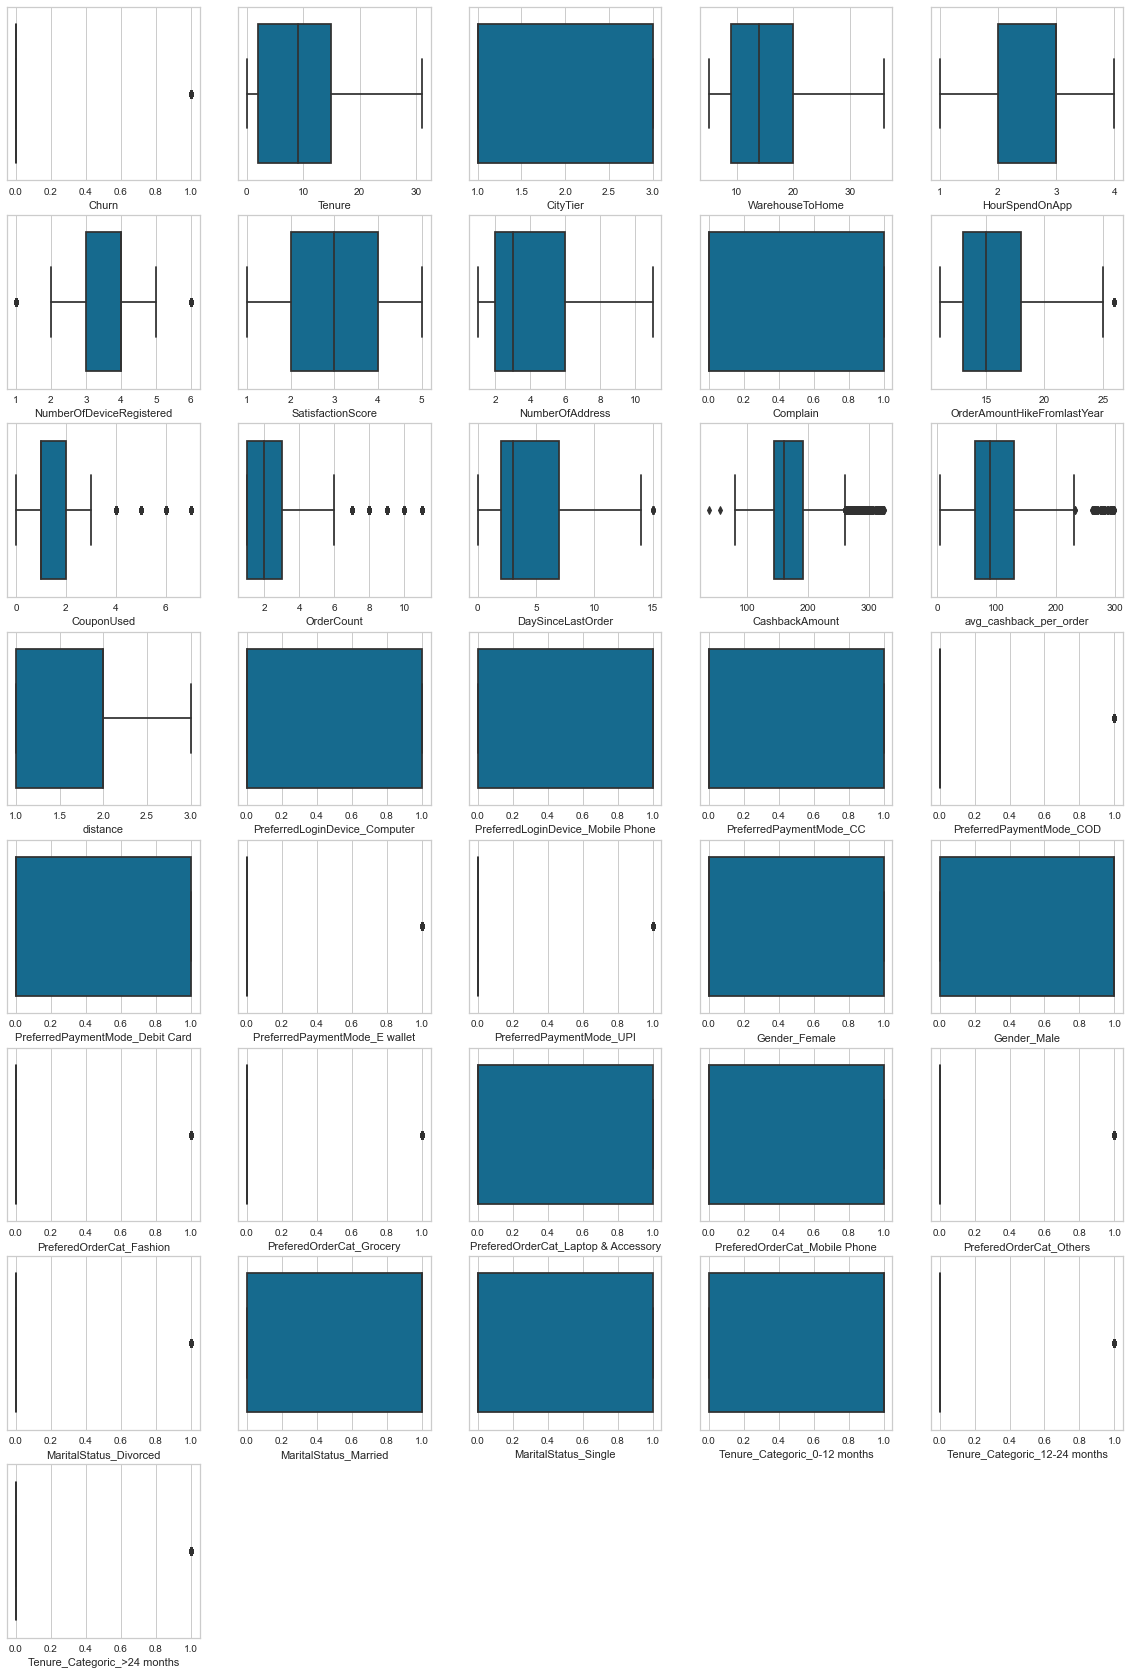

time: 5.86 s (started: 2022-01-29 21:54:05 +07:00)


In [59]:
# Plot distribution data using boxplot
num_col = df.select_dtypes('number').columns
plt.figure(figsize=(20, 30))
pos = 1

for i in num_col:
    plt.subplot(8, 5, pos)
    sns.boxplot(data=df, x=i)
    pos += 1

Karena pada data kita terdapat nilai outliers, maka lakukan scaling menggunakan RobustScaler.

In [60]:
# Feature scaling using RobustScaler
df[num_col] = RobustScaler().fit_transform(df[num_col])
df

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,avg_cashback_per_order,distance,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredPaymentMode_CC,PreferredPaymentMode_COD,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Female,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Tenure_Categoric_0-12 months,Tenure_Categoric_12-24 months,Tenure_Categoric_>24 months
0,1.0,-0.384615,1.0,-0.727273,0.0,-1.0,-0.5,1.50,1.0,-0.8,0.0,-0.5,0.4,-0.032265,1.060497,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0
1,1.0,0.000000,0.0,-0.545455,0.0,0.0,0.0,1.00,1.0,0.0,-1.0,-0.5,-0.6,-0.877436,0.473866,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0
2,1.0,0.000000,0.0,1.454545,-1.0,0.0,0.0,0.75,1.0,-0.2,-1.0,-0.5,0.0,-0.890862,0.464547,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0
3,1.0,-0.692308,1.0,0.090909,-1.0,0.0,1.0,1.25,0.0,1.6,-1.0,-0.5,0.0,-0.592248,0.671815,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0
4,1.0,-0.692308,0.0,-0.181818,0.0,-1.0,1.0,0.00,0.0,-0.8,0.0,-0.5,0.0,-0.689043,0.604629,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0.0,0.076923,0.0,1.454545,0.0,-2.0,-1.0,0.75,0.0,0.6,0.0,0.0,0.2,-0.231919,-0.210687,1.0,1.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5626,0.0,0.307692,0.0,-0.090909,0.0,1.0,1.0,0.75,0.0,0.2,0.0,0.0,0.0,1.374838,0.346936,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0
5627,0.0,-0.615385,0.0,-0.272727,0.0,-2.0,0.5,0.00,1.0,1.2,0.0,0.0,0.2,0.541360,0.057679,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5628,0.0,1.076923,1.0,-0.454545,1.0,1.0,0.5,0.25,0.0,0.0,1.0,0.0,1.2,0.378519,0.001165,-1.0,1.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0


time: 188 ms (started: 2022-01-29 21:54:11 +07:00)


# Sampling Dataset

## Separating Train and Test Set

In [61]:
# Separate feature and target
X = df.drop('Churn', axis=1)
y = df['Churn']

time: 0 ns (started: 2022-01-29 21:54:11 +07:00)


In [62]:
# Separate train and test set for modelling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and test set dimension
print('Shape of X_train', X_train.shape)
print('Shape of y_train', y_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of y_test', y_test.shape)

Shape of X_train (4280, 35)
Shape of y_train (4280,)
Shape of X_test (1070, 35)
Shape of y_test (1070,)
time: 32 ms (started: 2022-01-29 21:54:11 +07:00)


## Oversampling Using SMOTE
Karena pada target yang kita miliki terdapat imbalanced class, maka kita akan melakukan oversampling menggunakan metode SMOTE. Oversampling hanya dilakukan pada data training.

In [63]:
# Distribution of training target
y_train.value_counts()

0.0    3540
1.0     740
Name: Churn, dtype: int64

time: 47 ms (started: 2022-01-29 21:54:11 +07:00)


In [64]:
# oversampling
X_train_over, y_train_over = SMOTE().fit_resample(X_train, y_train)

# distribution target after oversampling
pd.Series(y_train_over).value_counts()

1.0    3540
0.0    3540
Name: Churn, dtype: int64

time: 125 ms (started: 2022-01-29 21:54:11 +07:00)


# Modeling

Pada tahap modelling kita akan membandingkan beberapa metode yang nantinya kita akan pilih mana model yang menghasilkan performa terbaik. Model dengan performa terbaik yang nantinya akan kita pilih dalam tahap selanjutnya.

## Choose the Best Classifier

In [65]:
# Model assignment
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
etc = ExtraTreesClassifier() 
gbc = GradientBoostingClassifier()
bgc = BaggingClassifier()
knn = KNeighborsClassifier() 
logreg = LogisticRegression()
nb = GaussianNB()
svm = SVC()
xgb = XGBClassifier(eval_metric='mlogloss')
mlp = MLPClassifier()

# Assign model to a list
models = [dtc, rfc, abc, etc, gbc, bgc, knn, logreg, nb, svm, xgb, mlp]

model_name = []

# Get Classifier names for every model
for name in models:
    names = str(type(name)).split('.')[-1][:-2]
    # Append classifier names to model_name list
    model_name.append(names)

time: 0 ns (started: 2022-01-29 21:54:11 +07:00)


### Cross Validation
Pada tahap ini kita lakukan training pada seluruh data menggunakan cross validation.

In [66]:
# Cross validation for each model 
dtc_score = cross_val_score(models[0], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
rfc_score = cross_val_score(models[1], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
abc_score = cross_val_score(models[2], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
etc_score = cross_val_score(models[3], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
gbc_score = cross_val_score(models[4], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
bgc_score = cross_val_score(models[5], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
knn_score = cross_val_score(models[6], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
logreg_score = cross_val_score(models[7], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
nb_score = cross_val_score(models[8], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
svm_score = cross_val_score(models[9], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
xgb_score = cross_val_score(models[10], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
mlp_score = cross_val_score(models[11], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5

time: 44.6 s (started: 2022-01-29 21:54:12 +07:00)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.4s finished


In [67]:
# List of score per model
cv_result = [
    dtc_score, rfc_score, abc_score, etc_score, gbc_score, bgc_score, 
    knn_score, logreg_score, nb_score, svm_score, xgb_score, mlp_score]

# Create dataframe for score every k-fold
df_cv_result = pd.DataFrame(cv_result, index=model_name)
df_cv_result

,0,1,2,3,4
DecisionTreeClassifier,0.986916,0.986916,0.989720,0.977570,0.987850
RandomForestClassifier,0.995327,0.988785,0.992523,0.992523,0.987850
AdaBoostClassifier,0.888785,0.893458,0.900935,0.900000,0.900000
ExtraTreesClassifier,0.997196,0.990654,0.992523,0.999065,0.989720
GradientBoostingClassifier,0.916822,0.916822,0.926168,0.920561,0.926168
BaggingClassifier,0.988785,0.975701,0.972897,0.977570,0.977570
KNeighborsClassifier,0.931776,0.926168,0.910280,0.930841,0.933645
LogisticRegression,0.889720,0.892523,0.898131,0.898131,0.897196
GaussianNB,0.429907,0.426168,0.420561,0.438318,0.440187
SVC,0.910280,0.909346,0.916822,0.924299,0.923364


time: 15 ms (started: 2022-01-29 21:54:56 +07:00)


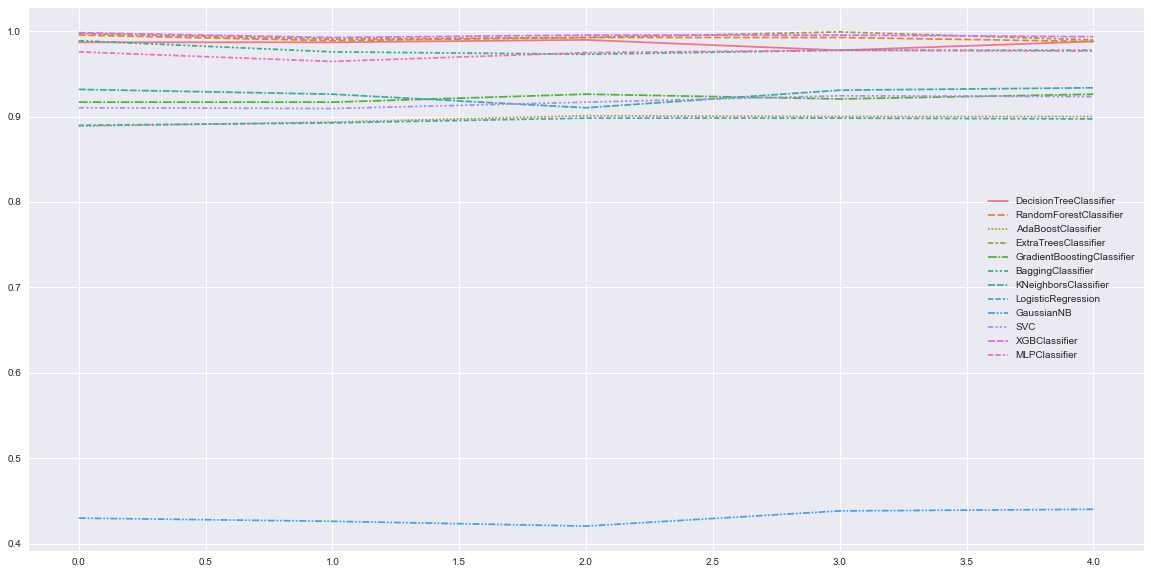

time: 922 ms (started: 2022-01-29 21:54:56 +07:00)


In [68]:
# Plot cross validation score
sns.set_style('darkgrid')
plt.figure(figsize=(20,10))
sns.lineplot(data=df_cv_result.T)
plt.show()

In [69]:
# Calculate average for every k-fold validation
cv_mean = []
i = 0
for mean in cv_result:
    mean = cv_result[i].mean()
    cv_mean.append(mean)
    i += 1

time: 0 ns (started: 2022-01-29 21:54:57 +07:00)


In [70]:
# Calculate standard deviation for every k-fold validation
cv_std = []
i = 0 
for std in cv_result:
    std = cv_result[i].std()
    cv_std.append(std)
    i += 1

time: 203 ms (started: 2022-01-29 21:54:57 +07:00)


In [71]:
# Average and standard deviation score for each model
df_cv = pd.DataFrame({'score_mean':cv_mean, 'score_std':cv_std}, index=model_name).sort_values(['score_mean', 'score_std'], ascending=[False, True])
df_cv

,score_mean,score_std
XGBClassifier,0.994953,0.001924
ExtraTreesClassifier,0.993832,0.003672
RandomForestClassifier,0.991402,0.002734
DecisionTreeClassifier,0.985794,0.004238
BaggingClassifier,0.978505,0.005417
MLPClassifier,0.973832,0.004765
KNeighborsClassifier,0.926542,0.008496
GradientBoostingClassifier,0.921308,0.004196
SVC,0.916822,0.006283
AdaBoostClassifier,0.896636,0.004751


time: 78 ms (started: 2022-01-29 21:54:57 +07:00)


Pada eksperimen diatas didapatkan nilai rata-rata akurasi dan standard deviasi nya dari setiap k-fold validation. XGBClassifier memiliki performa terbaik dengan rata-rata akurasi mencapai 97.69% dengan standard deviasi 0.007.

### Fit and Evaluation
Selain dengan menggunakan Cross Validation, saya juga melakukan uji nilai akurasi pada data training dan testing yang bertujuan untuk melihat akurasi saat data training dan testing dan perbedaaannya. Maka di dapatkan hasil sebagai berikut :

In [72]:
# Create a list to assign a model score
train_score = []
test_score = []

# Create dataframe
df_train_test = pd.DataFrame()
for i in models:
    # Fit each model
    model = i.fit(X_train_over, y_train_over)
    # accuracy for training set
    train_score.append(model.score(X_train_over, y_train_over))
    # accuracy for testing set
    test_score.append(model.score(X_test, y_test))

time: 39.4 s (started: 2022-01-29 21:54:58 +07:00)


In [73]:
# Create a dataframe to store accuracy score
df_avg_score = pd.DataFrame({
    'train score':train_score,
    'test score':test_score},
    index=model_name)

# Create a new column for the difference in accuracy score 
df_avg_score['difference'] = abs(df_avg_score['train score'] - df_avg_score['test score'])
# Sort accuracy by smallest difference
df_avg_score = df_avg_score.sort_values(['train score', 'test score','difference'], ascending=[False, False, True])
df_avg_score

,train score,test score,difference
XGBClassifier,1.000000,0.976636,0.023364
ExtraTreesClassifier,1.000000,0.973832,0.026168
RandomForestClassifier,1.000000,0.972897,0.027103
DecisionTreeClassifier,1.000000,0.942056,0.057944
MLPClassifier,0.999576,0.977570,0.022006
BaggingClassifier,0.998870,0.952336,0.046534
SVC,0.957910,0.902804,0.055106
KNeighborsClassifier,0.950282,0.862617,0.087666
GradientBoostingClassifier,0.946751,0.924299,0.022452
AdaBoostClassifier,0.911299,0.880374,0.030926


time: 47 ms (started: 2022-01-29 21:55:37 +07:00)


Terlihat bahwa ExtraTreeClassifier memiliki perbedaan nilai akurasi terkecil, hanya selisih sekitar 1.5%. XGBClassifier menjadi model kedua yang memiliki peeforma terbaik dengan perbedaan sekitar 1.8%,  Gaussian Naive Bayer memiliki nilai akurasi yang cukup tinggi pada data training, yaitu sekitar 72%, tetapi memiliki nilai akurasi yang cukup kecil pada data testing dengan perbedaan mencapai 10%.

### Cross Validation for Some Metrics
Kali ini kita akan lakukan cross validation untuk mengukur performa model dengan beberapa metrik, yaitu accuracy, precision, recall, dan f1-score.

In [74]:
# Cross validation for each model
dtc_score = cross_validate(models[0], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=5, n_jobs=-1, verbose=1)
rfc_score = cross_validate(models[1], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=5, n_jobs=-1, verbose=1)
abc_score = cross_validate(models[2], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=5, n_jobs=-1, verbose=1)
etc_score = cross_validate(models[3], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=5, n_jobs=-1, verbose=1)
gbc_score = cross_validate(models[4], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=5, n_jobs=-1, verbose=1)
bgc_score = cross_validate(models[5], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=5, n_jobs=-1, verbose=1)
knn_score = cross_validate(models[6], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=5, n_jobs=-1, verbose=1)
logreg_score = cross_validate(models[7], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=5, n_jobs=-1, verbose=1)
nb_score = cross_validate(models[8], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=5, n_jobs=-1, verbose=1)
svm_score = cross_validate(models[9], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=5, n_jobs=-1, verbose=1)
xgb_score = cross_validate(models[10], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=5, n_jobs=-1, verbose=1)
mlp_score = cross_validate(models[11], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=5, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5

time: 42 s (started: 2022-01-29 21:55:37 +07:00)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.9s finished


In [75]:
cv_result = [
    dtc_score, rfc_score, abc_score, etc_score, gbc_score, bgc_score, 
    knn_score, logreg_score, nb_score, svm_score, xgb_score, mlp_score]

# Average score for each metrics
df_cv_result = pd.DataFrame(cv_result, index=model_name).applymap(np.mean)
df_cv_result = df_cv_result.sort_values(['test_accuracy', 'test_recall'], ascending=False)
df_cv_result = df_cv_result.reset_index()
df_cv_result.rename(columns={'index':'Model'}, inplace=True)
df_cv_result

,Model,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,XGBClassifier,2.341999,0.026943,0.994953,0.983745,0.986837,0.985234
1,ExtraTreesClassifier,1.090426,0.096060,0.994019,0.997771,0.967099,0.982055
2,RandomForestClassifier,1.327474,0.166759,0.989907,0.992042,0.948466,0.969627
3,DecisionTreeClassifier,0.075787,0.015735,0.983364,0.940425,0.963814,0.951877
4,BaggingClassifier,0.572313,0.033211,0.980374,0.962775,0.921017,0.941031
5,MLPClassifier,11.585348,0.021790,0.976262,0.951846,0.906798,0.928686
6,KNeighborsClassifier,0.011205,0.504525,0.926542,0.880330,0.657869,0.752698
7,GradientBoostingClassifier,2.379903,0.023016,0.921121,0.845352,0.658998,0.740171
8,SVC,1.476613,0.719390,0.916822,0.906456,0.571351,0.700105
9,AdaBoostClassifier,0.651615,0.060535,0.896636,0.750368,0.589996,0.659951


time: 31 ms (started: 2022-01-29 21:56:19 +07:00)


Dari hasil diatas, XGBClassifier memiliki nilai akurasi dan recall yang paling tinggi dari keseluruhan model. Pada kasus ini selain nilai akurasi yang kita perhitungkan, recall juga akan kita perhitungkan karena **kita lebih ingin model kita dapat mengklasifikasi lebih banyak False Positive(FP) daripada False Negative (FN)**. 
FP pada kasus ini yaitu model memprediksi customer akan mengalami churn, tetapi sebenarnya tidak churn. Maka FP lebih baik daripada FN. FN yaitu model memprediksi customer tidak akan churn tetapi sebenarnya churn, dan hal ini **dapat menyebabkan semakin banyak customer yang tidak bisa kita lakukan penawaran lebih lanjut sehingga mereka churn**.  

> Dari keseluruhan proses diatas, maka saya akan memilih model **XGBClassifier** karena memiliki nilai akurasi dan recall yang cukup tinggi.

## XBGClassifier
Pada tahap ini kita akan melakukan perbandingan performa model sebelum dan sesudah dilakukan feature selection.

### Default Parameter

In [76]:
# Fit classifier
xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb.fit(X_train_over, y_train_over)

# predict test set
y_pred_def = xgb.predict(X_test)

# Calculate accuracy, precision, recall, and f1-score
train_score_def = round((xgb.score(X_train_over, y_train_over) * 100), 2)
test_score_def = round((xgb.score(X_test, y_test) * 100), 2)
prec_score_def = round((precision_score(y_test, y_pred_def)) * 100, 2)
recall_score_def = round((recall_score(y_test, y_pred_def)) * 100, 2)
f1_def = round(f1_score(y_test, y_pred_def)*100, 2)

print('Training Accuracy : {}%'.format(train_score_def))
print('Test Accuracy : {}%'.format(test_score_def))
print('Precision Score : {}%'.format(prec_score_def))
print('Recall Score : {}%'.format(recall_score_def))
print('F1 Score : {}%'.format(f1_def))

Training Accuracy : 100.0%
Test Accuracy : 97.66%
Precision Score : 95.65%
Recall Score : 89.53%
F1 Score : 92.49%
time: 2.12 s (started: 2022-01-29 21:56:19 +07:00)


### RFE for Feature Selection
Pada tahap feature selection ini, kita akan lakukan menggunakan Recursive Feature Elimination. Nantinya akan didapatkan feature yang paling relevan dengan target.     

In [77]:
rfe = RFECV(xgb, cv=5, scoring='accuracy')
rfe = rfe.fit(X, y)

time: 2min 6s (started: 2022-01-29 21:56:22 +07:00)


Optimal number of features : 23


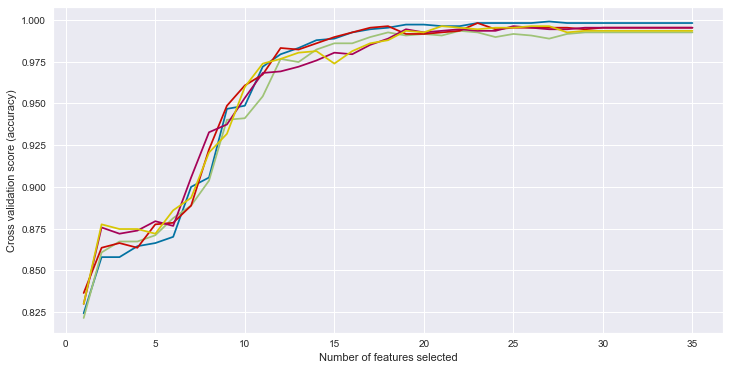

time: 406 ms (started: 2022-01-29 21:58:29 +07:00)


In [78]:
print("Optimal number of features : %d" % rfe.n_features_)

plt.figure(figsize=(12, 6))
plt.plot(
    range(1, len(rfe.grid_scores_) + 1),
    rfe.grid_scores_,
)
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.show()

In [79]:
pd.DataFrame({'ranking':rfe.ranking_}, index=rfe.feature_names_in_).sort_values('ranking')

,ranking
Tenure,1
MaritalStatus_Single,1
MaritalStatus_Married,1
PreferedOrderCat_Others,1
PreferedOrderCat_Mobile Phone,1
PreferedOrderCat_Laptop & Accessory,1
PreferedOrderCat_Fashion,1
PreferredPaymentMode_E wallet,1
PreferredPaymentMode_COD,1
PreferredLoginDevice_Computer,1


time: 16 ms (started: 2022-01-29 21:58:29 +07:00)


In [80]:
# list of relevant features
relevant_column = list(X.columns[rfe.support_])

# Filtering feature from RFE
df_rfe = df[relevant_column]
# Assign target
df_rfe['Churn'] = y
df_rfe

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,OrderCount,DaySinceLastOrder,CashbackAmount,avg_cashback_per_order,PreferredLoginDevice_Computer,PreferredPaymentMode_CC,PreferredPaymentMode_COD,PreferredPaymentMode_E wallet,PreferedOrderCat_Fashion,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,Churn
0,-0.384615,1.0,-0.727273,0.0,-1.0,-0.5,1.50,1.0,-0.8,-0.5,0.4,-0.032265,1.060497,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0,1.0
1,0.000000,0.0,-0.545455,0.0,0.0,0.0,1.00,1.0,0.0,-0.5,-0.6,-0.877436,0.473866,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,1.0,1.0
2,0.000000,0.0,1.454545,-1.0,0.0,0.0,0.75,1.0,-0.2,-0.5,0.0,-0.890862,0.464547,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,1.0,1.0
3,-0.692308,1.0,0.090909,-1.0,0.0,1.0,1.25,0.0,1.6,-0.5,0.0,-0.592248,0.671815,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0,1.0
4,-0.692308,0.0,-0.181818,0.0,-1.0,1.0,0.00,0.0,-0.8,-0.5,0.0,-0.689043,0.604629,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0.076923,0.0,1.454545,0.0,-2.0,-1.0,0.75,0.0,0.6,0.0,0.2,-0.231919,-0.210687,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5626,0.307692,0.0,-0.090909,0.0,1.0,1.0,0.75,0.0,0.2,0.0,0.0,1.374838,0.346936,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5627,-0.615385,0.0,-0.272727,0.0,-2.0,0.5,0.00,1.0,1.2,0.0,0.2,0.541360,0.057679,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5628,1.076923,1.0,-0.454545,1.0,1.0,0.5,0.25,0.0,0.0,0.0,1.2,0.378519,0.001165,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


time: 156 ms (started: 2022-01-29 21:58:29 +07:00)


Dari hasil RFE diatas didapatkan sebanyak 23 feature yang paling relevan dalam memprediksi target.
Selanjutnya lakukan training data dari hasil RFE.

In [81]:
# Separate features and target
X = df_rfe.drop('Churn', axis=1)
y = df_rfe['Churn']

# Separate train and test set for modelling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and test set dimension
print('Shape of X_train', X_train.shape)
print('Shape of y_train', y_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of y_test', y_test.shape)

Shape of X_train (4280, 23)
Shape of y_train (4280,)
Shape of X_test (1070, 23)
Shape of y_test (1070,)
time: 16 ms (started: 2022-01-29 21:58:29 +07:00)


In [82]:
# Oversampling using SMOTE method
X_train_over, y_train_over = SMOTE().fit_resample(X_train, y_train)

pd.Series(y_train_over).value_counts()

1.0    3540
0.0    3540
Name: Churn, dtype: int64

time: 109 ms (started: 2022-01-29 21:58:29 +07:00)


In [83]:
xgb_rfe = XGBClassifier(eval_metric='mlogloss')
# Fit classifier
xgb_rfe.fit(X_train_over, y_train_over)

# Predict test set
y_pred_rfe = xgb_rfe.predict(X_test)

#Calculate accuracy, precision, recall, and f1-score
train_score_rfe = round((xgb_rfe.score(X_train_over, y_train_over) * 100), 2)
test_score_rfe = round((xgb_rfe.score(X_test, y_test) * 100), 2)
prec_score_rfe = round((precision_score(y_test, y_pred_rfe)) * 100, 2)
recall_score_rfe = round((recall_score(y_test, y_pred_rfe)) * 100, 2)
f1_rfe = round(f1_score(y_test, y_pred_rfe)*100, 2)

print('Training Accuracy : {}%'.format(train_score_rfe))
print('Test Accuracy : {}%'.format(test_score_rfe))
print('Precision Score : {}%'.format(prec_score_rfe))
print('Recall Score : {}%'.format(recall_score_rfe))
print('F1 Score : {}%'.format(f1_rfe))

Training Accuracy : 100.0%
Test Accuracy : 97.94%
Precision Score : 95.73%
Recall Score : 91.28%
F1 Score : 93.45%
time: 1.66 s (started: 2022-01-29 21:58:30 +07:00)


In [84]:
pd.DataFrame({
    'train_acc':[train_score_def, train_score_rfe],
    'test_acc':[test_score_def, test_score_rfe],
    'precision':[prec_score_def, prec_score_rfe],
    'recall':[recall_score_def, recall_score_rfe],
    'f1-score':[f1_def, f1_rfe]}, index=['without_rfe', 'with_rfe'])

,train_acc,test_acc,precision,recall,f1-score
without_rfe,100.0,97.66,95.65,89.53,92.49
with_rfe,100.0,97.94,95.73,91.28,93.45


time: 16 ms (started: 2022-01-29 21:58:31 +07:00)


Setelah dilakukan feature selection, teryata didapatkan performa model yang lebih baik dari sebelum melakukan feature selection.

# Model Evaluation
Lakukan evaluasi terhadap model, seperti melihat confusion matrix, classification report dan feature importance hasil  training.

## Confusion Matrix

[[891   7]
 [ 15 157]]


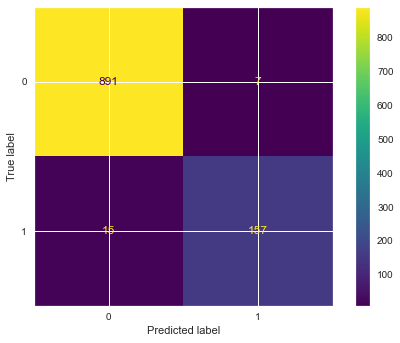

time: 469 ms (started: 2022-01-29 21:58:31 +07:00)


In [85]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rfe)
print(cm)
ConfusionMatrixDisplay(cm).plot()
plt.show()

## Classification Report

In [86]:
# Classification report model
cr = classification_report(y_test, y_pred_rfe)
print(cr)

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       898
         1.0       0.96      0.91      0.93       172

    accuracy                           0.98      1070
   macro avg       0.97      0.95      0.96      1070
weighted avg       0.98      0.98      0.98      1070

time: 16 ms (started: 2022-01-29 21:58:32 +07:00)


## Precision Recall and ROC Curve

In [87]:
# Precision Recall Curve
y_pred_rfe = xgb_rfe.predict_proba(X_test)[:,1]
prec, recall, _ = precision_recall_curve(y_test, y_pred_rfe, pos_label=xgb_rfe.classes_[1])
pr_display = PrecisionRecallDisplay(prec, recall)

time: 62 ms (started: 2022-01-29 21:58:32 +07:00)


In [88]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_rfe, pos_label=xgb_rfe.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

time: 63 ms (started: 2022-01-29 21:58:32 +07:00)


ROC AUC Score is : 0.9921919511058166


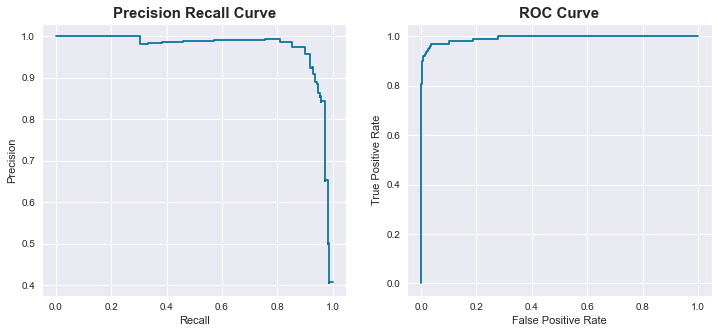

time: 609 ms (started: 2022-01-29 21:58:32 +07:00)


In [89]:
# roc auc score
auc_score = roc_auc_score(y_test, y_pred_rfe)
print(f'ROC AUC Score is : {auc_score}')

# Plotting Precision Recall and ROC Curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

pr_display.plot(ax=ax1)
roc_display.plot(ax=ax2)
ax1.set_title('Precision Recall Curve', fontsize=15, fontweight='bold')
ax2.set_title('ROC Curve', fontsize=15, fontweight='bold')
plt.show()

## Feature Importance

In [90]:
feature_importance = pd.DataFrame({
    'Features':X.columns,
    'Importance':xgb_rfe.feature_importances_}).sort_values('Importance', ascending=False)

time: 0 ns (started: 2022-01-29 21:58:33 +07:00)


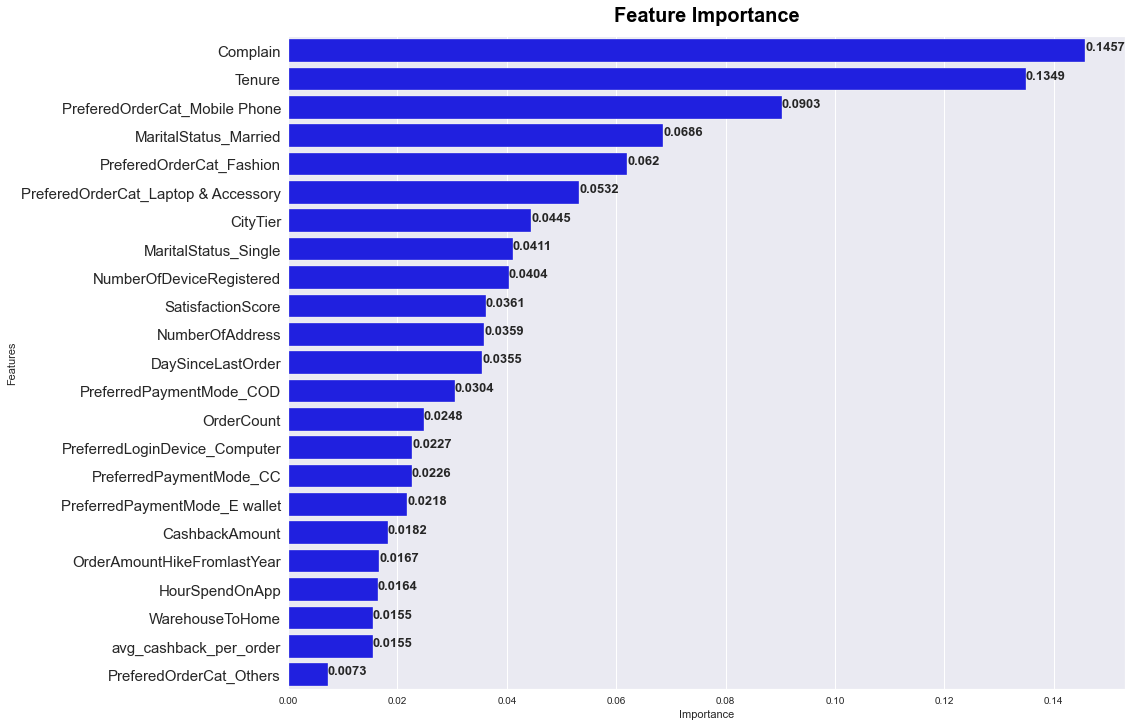

time: 1.36 s (started: 2022-01-29 21:58:33 +07:00)


In [91]:
plt.figure(figsize=(15, 12))
sns.barplot(data=feature_importance, x='Importance', y='Features', color='blue')

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x[i],i, round(x[i], 4), fontsize=13, fontweight='bold')

x = list(feature_importance['Importance'])
y = list(feature_importance['Features'])

plt.title('Feature Importance', fontsize=20, color='black', pad=15, fontweight='bold')
plt.yticks(fontsize=15)
addlabels(x, y)
plt.show()

## Thresholds Adjustment
Selanjutnya kita akan lakukan pemilihan thresholds untuk memilih nilai thresholds terbaik dengan menggunakan DiscriminationThreshold.

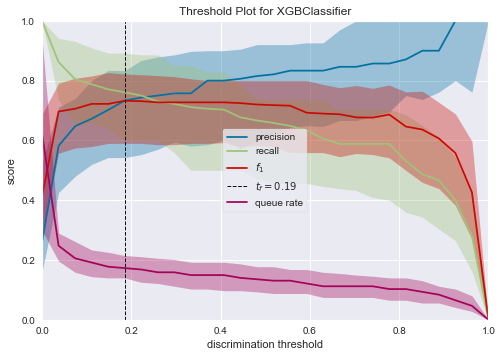

<AxesSubplot:title={'center':'Threshold Plot for XGBClassifier'}, xlabel='discrimination threshold', ylabel='score'>

time: 19.4 s (started: 2022-01-29 22:01:34 +07:00)


In [92]:
# Instantiate the classification model and visualizer
visualizer = DiscriminationThreshold(xgb_rfe)

# Fit the data to the visualizer
visualizer.fit(X_test, y_test)        
# Finalize and render the figure
visualizer.show()           

Dari hasil discrimination threshold diatas didapatkan thresholds paling ideal, yaitu 0.19.  
Maka setelah didapatkan thresholds yang optimal, maka thresholds tersebut kita gunakan untuk klasifikasi.
- Jika lebih dari nilai tersebut maka termasuk "Churn (1)"
- JIka sebaliknya berarti "Not Churn (0)".

In [93]:
# Create dataframe for appying thresholds
y_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_pred_rfe})
y_pred_final['final_prediction'] = y_pred_final['Churn_Prob'].apply(lambda x: 1 if x > 0.19 else 0)
y_pred_final.head(10)

,Churn,Churn_Prob,final_prediction
0,0.0,0.005034,0
1,0.0,0.017399,0
2,0.0,0.005596,0
3,0.0,0.001422,0
4,0.0,0.001514,0
5,0.0,0.000578,0
6,0.0,0.000068,0
7,0.0,0.000437,0
8,0.0,0.000203,0
9,0.0,0.000217,0


time: 15 ms (started: 2022-01-29 22:02:12 +07:00)


### Confusion Matrix

[[868  30]
 [  7 165]]


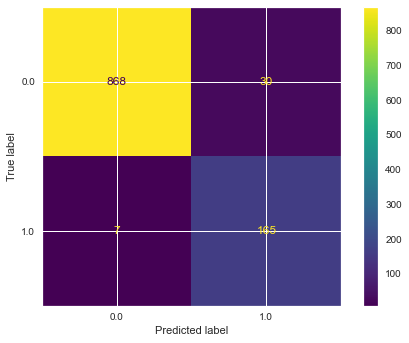

time: 406 ms (started: 2022-01-29 22:02:15 +07:00)


In [94]:
# Confusion Matrix
cm = confusion_matrix(y_pred_final['Churn'], y_pred_final['final_prediction'])
print(cm)
# Plotting confusion matrix
ConfusionMatrixDisplay(cm, display_labels=xgb_rfe.classes_).plot()
plt.show()

### Classification Report

In [95]:
# Classification Report
cr = classification_report(y_pred_final['Churn'], y_pred_final['final_prediction'])
print(cr)

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       898
         1.0       0.85      0.96      0.90       172

    accuracy                           0.97      1070
   macro avg       0.92      0.96      0.94      1070
weighted avg       0.97      0.97      0.97      1070

time: 31 ms (started: 2022-01-29 22:02:19 +07:00)


Dari hasil thresholds adjusment dapat dilihat bahwa hasilnya terdapat 936 berhasil diklasifikasi sebagai class 0 (Not Churn) dan sebanyak 172 diklasifikasi sebagai class 1 (Churn).

In [96]:
# Model performance after thresholds adjustment
acc_score_th = round(accuracy_score(y_pred_final['Churn'], y_pred_final['final_prediction']) * 100, 2)
prec_score_th = round(precision_score(y_pred_final['Churn'], y_pred_final['final_prediction']) * 100, 2)
recall_score_th = round(recall_score(y_pred_final['Churn'], y_pred_final['final_prediction']) * 100, 2)
f1_th = round(f1_score(y_pred_final['Churn'], y_pred_final['final_prediction']) * 100, 2)

time: 16 ms (started: 2022-01-29 22:02:21 +07:00)


In [97]:
pd.DataFrame({
    'accuracy':[test_score_rfe, acc_score_th],
    'precision':[prec_score_rfe, prec_score_th],
    'recall':[recall_score_rfe, recall_score_th],
    'f1-score':[f1_rfe, f1_th]}, index=['default thresholds', 'thresholds adjusment'])

,accuracy,precision,recall,f1-score
default thresholds,97.94,95.73,91.28,93.45
thresholds adjusment,96.54,84.62,95.93,89.92


time: 15 ms (started: 2022-01-29 22:02:23 +07:00)


## Insight

**Default Thresholds**
- TP (891)
- TN (157)
- FP (7)
- FN (15)

**Thresholds Adjusment**
- TP (868)
- TN (165)
- FP (30)
- FN (7)


Ternyata setelah dilakukan thresholds adjusment hasil yang didapatkan mengalami penurunan performa pada nilai akurasi, tetapi naik pada nilai recall. 
> Maka berdasarkan hasil tersebut kita akan menggunakan nilai thresholds tersebut karena memiliki nilai recall yang cukup besar. Meskipun akurasi nya mengalami penurunan, tetapi bisa dikatakan model cukup bisa mengenali data dengan baik.   

## Save Model

In [98]:
filename = 'xgb_model.sav'
pickle.dump(xgb_rfe, open(filename, 'wb'))

time: 62 ms (started: 2022-01-29 22:06:35 +07:00)
